# Neutralization Curves for GPC point mutants showing antibody dependent enhancement

In [1]:
# Imports
import os
import warnings
import neutcurve
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt, ticker as mticker
from IPython.display import display

# seaborn style settings
sns.set(rc={"figure.dpi":300, "savefig.dpi":300})
sns.set_style("ticks")

## Plot neut curves in the standard zero to one fraction infectivity range

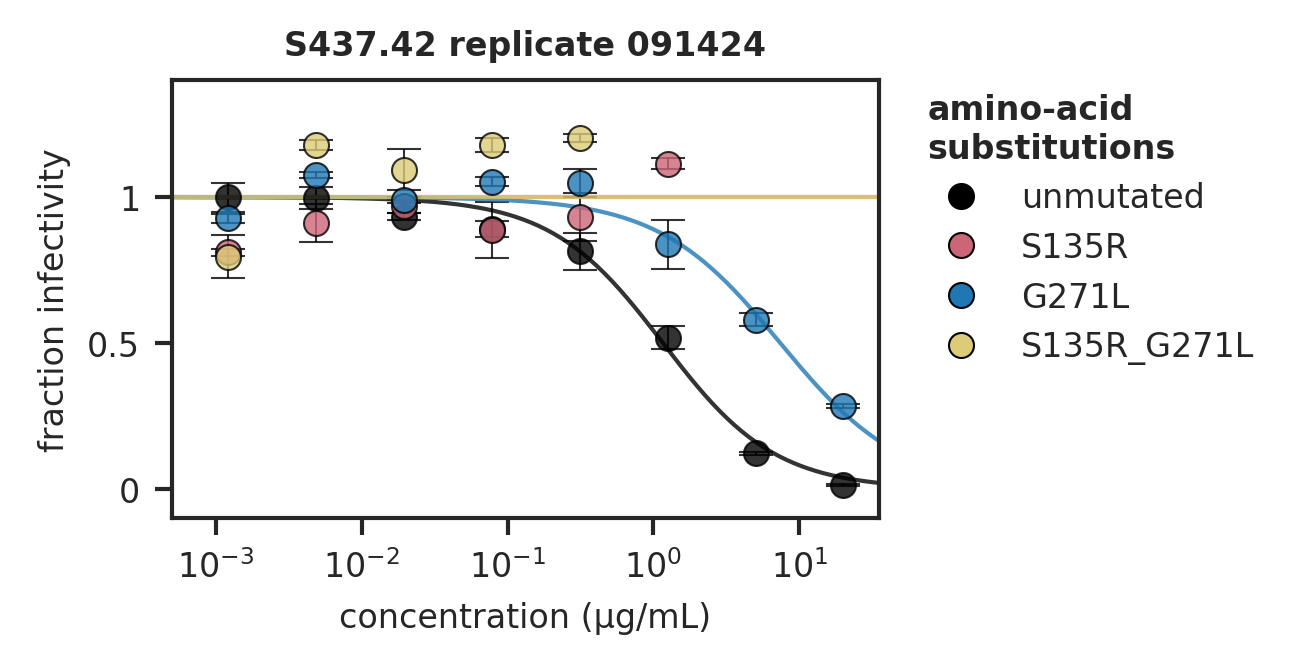

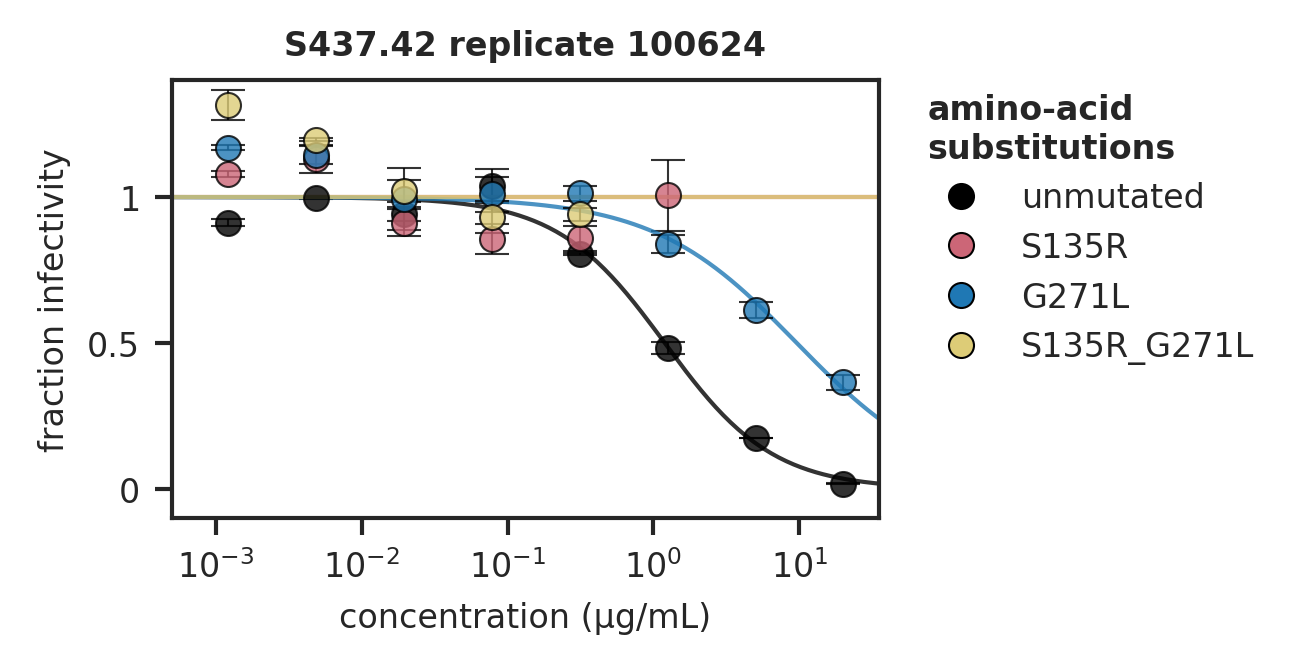

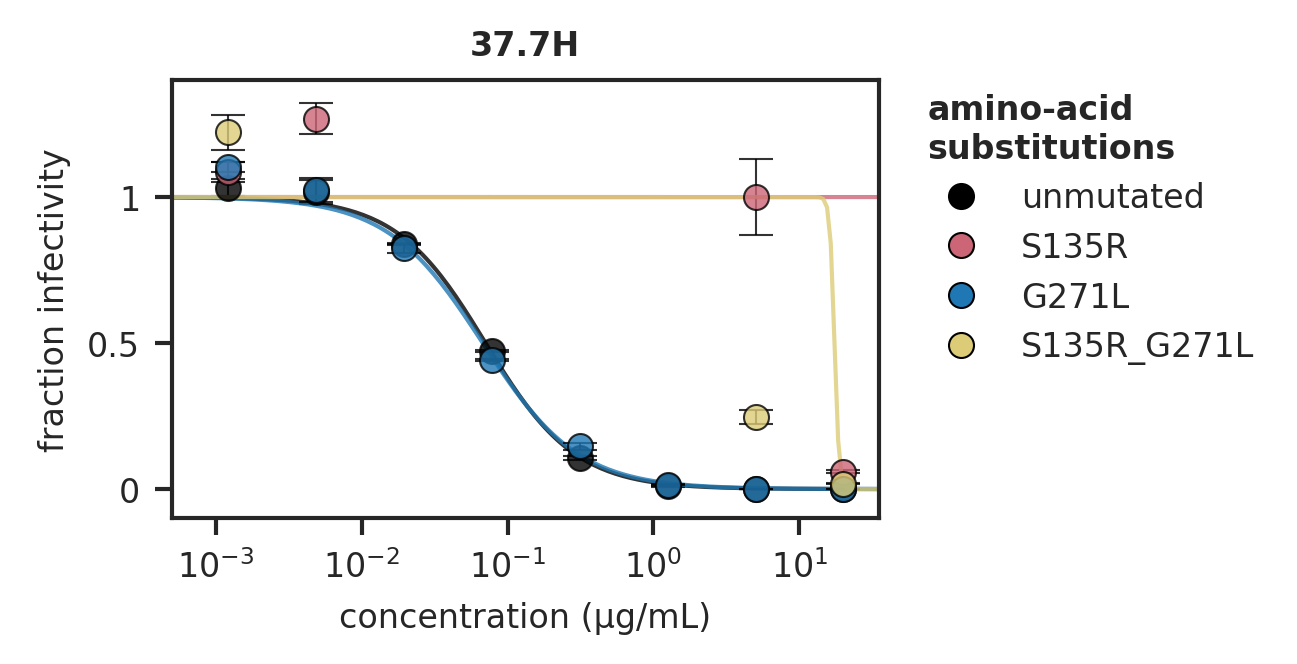

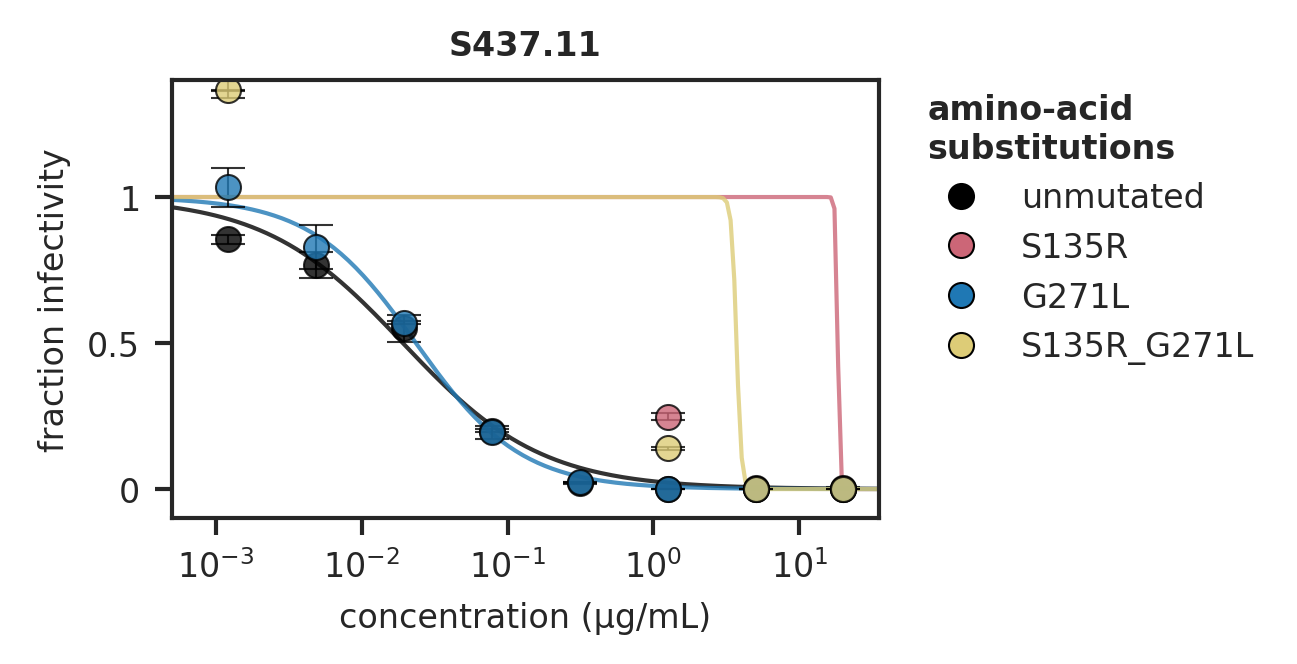

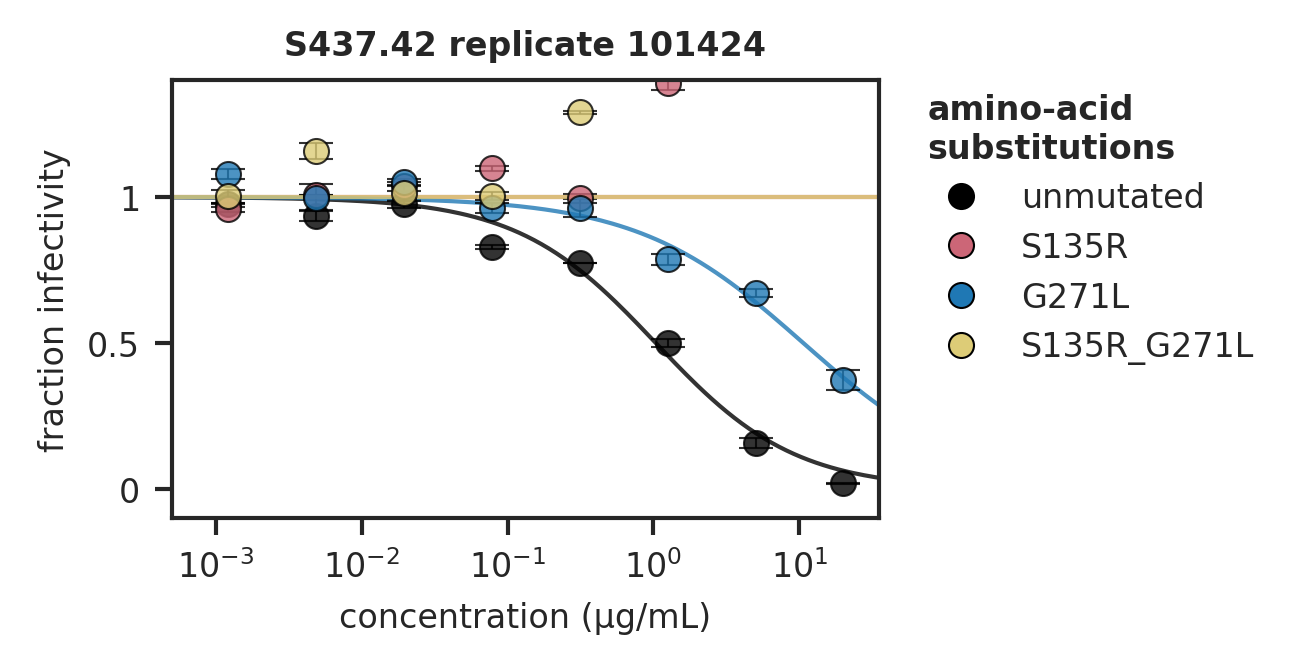

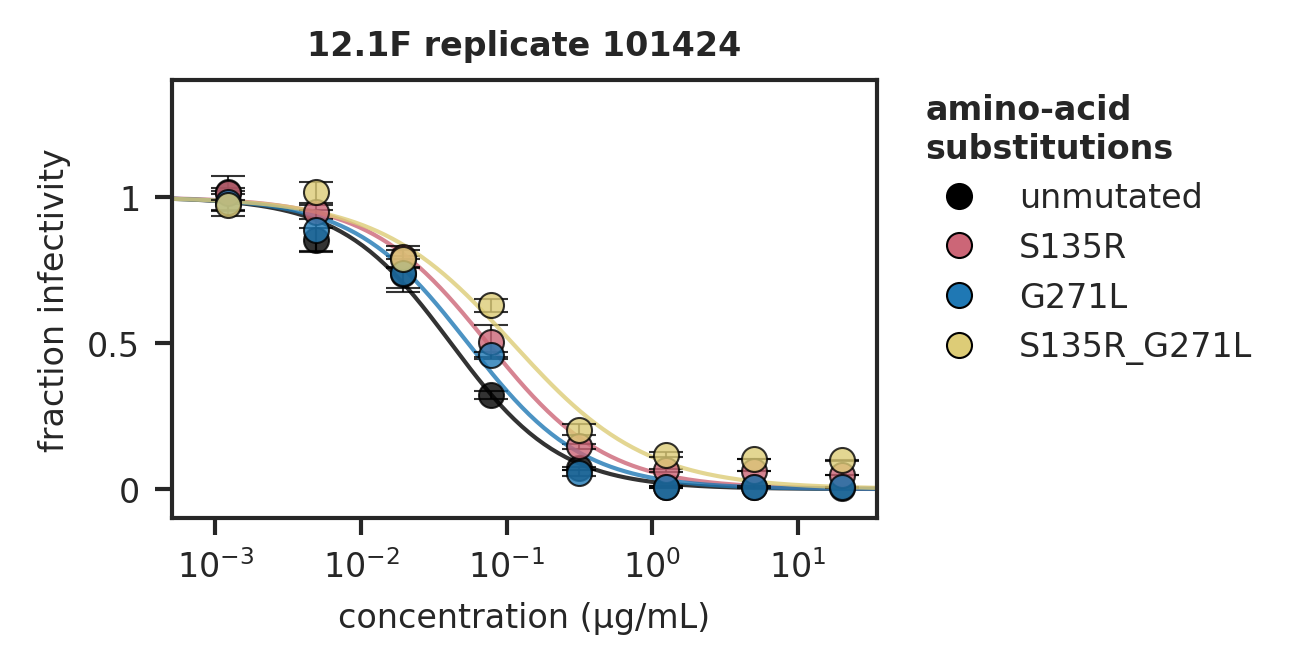

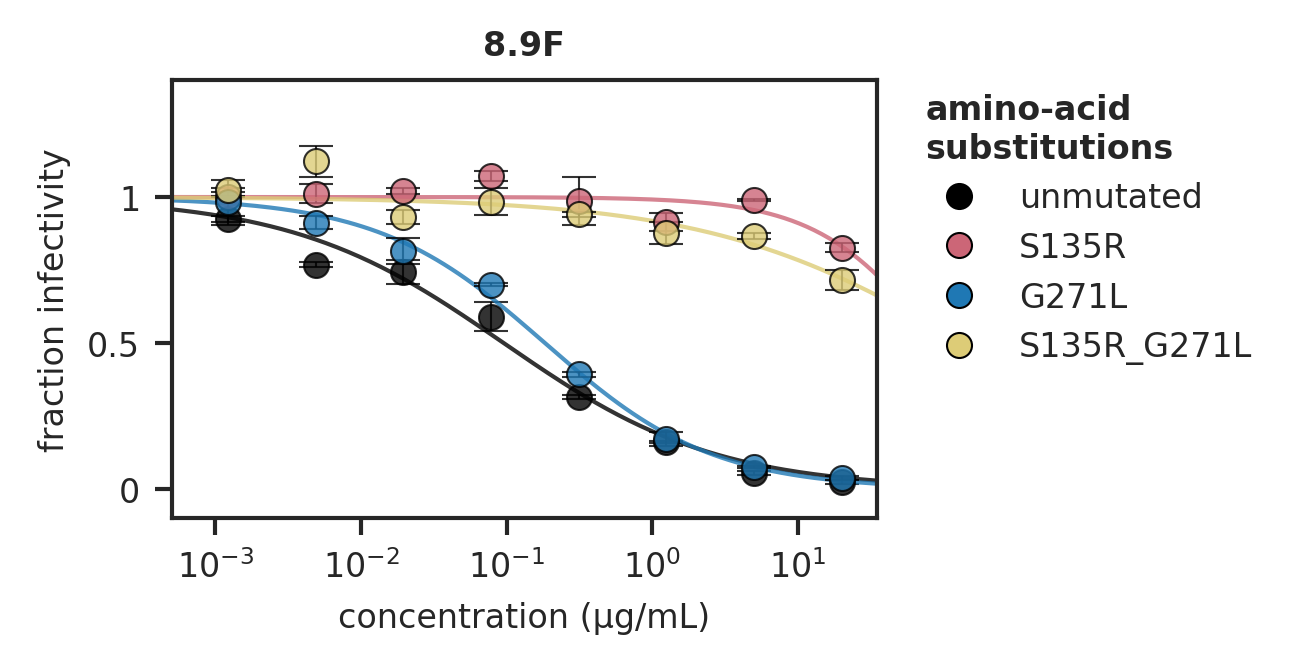

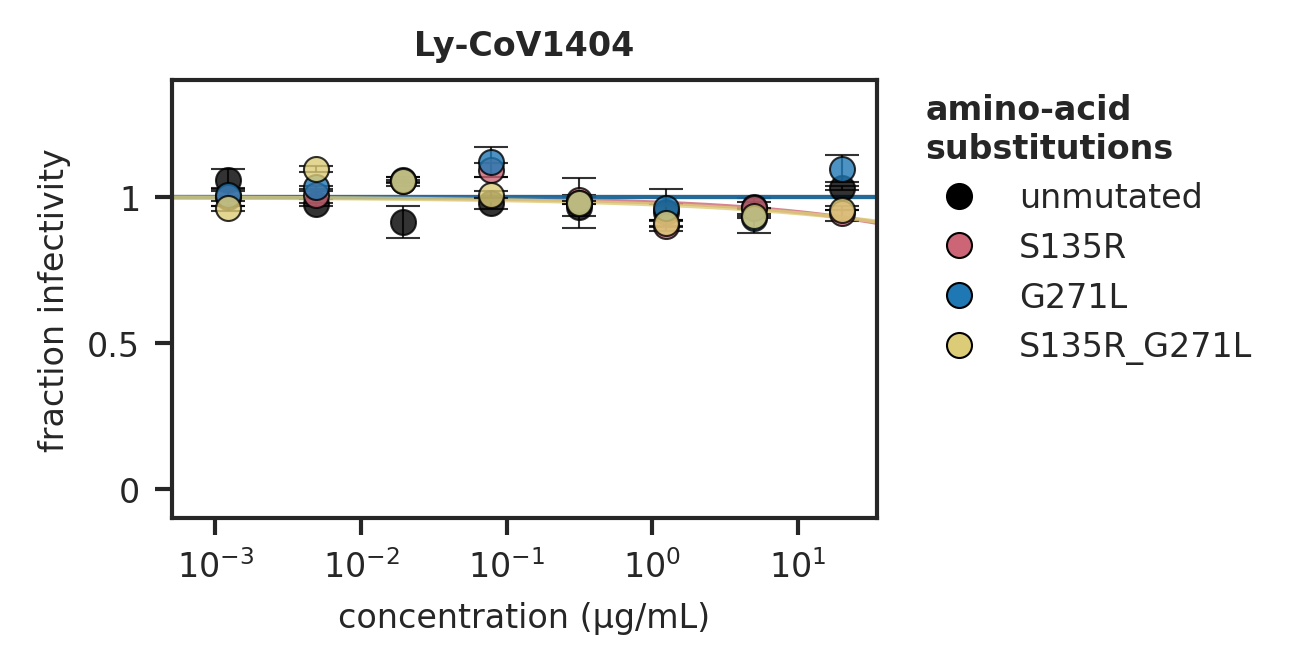

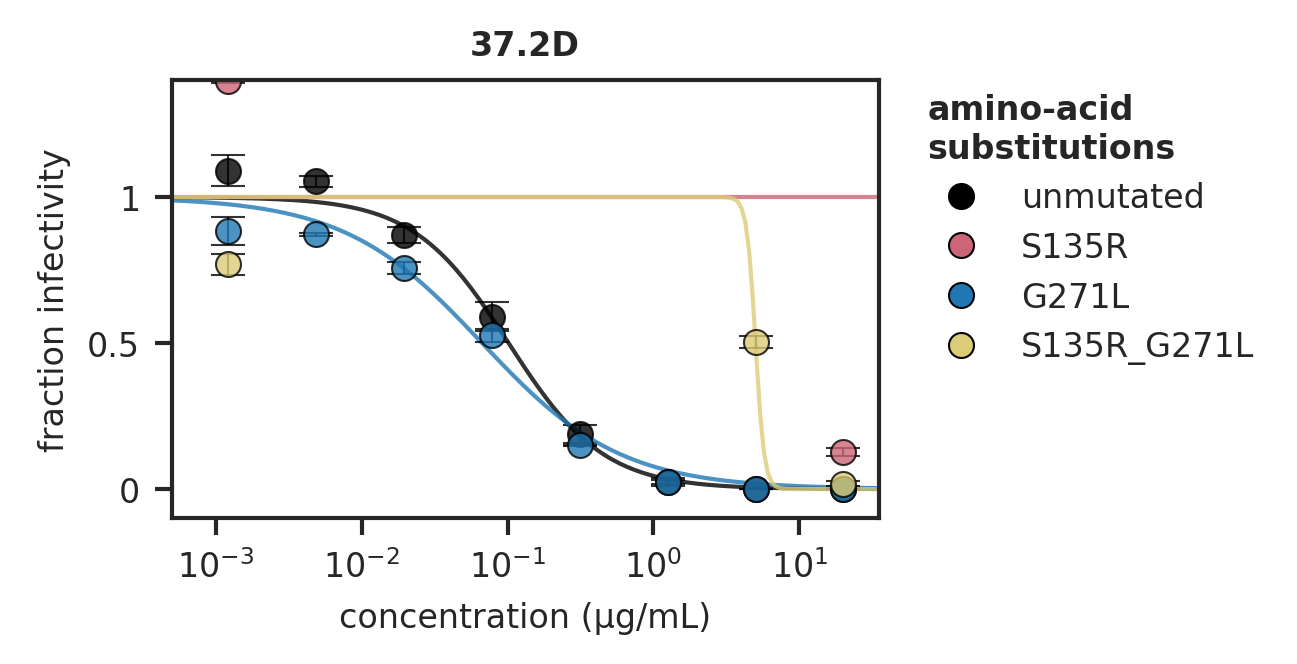

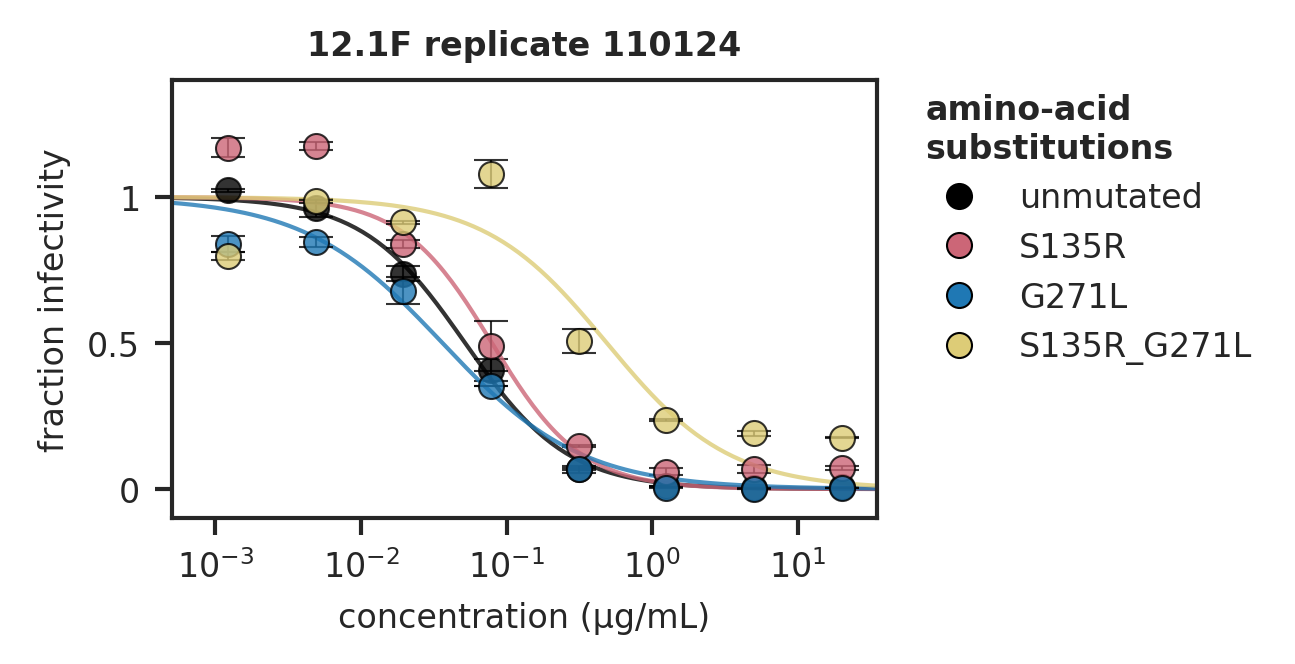

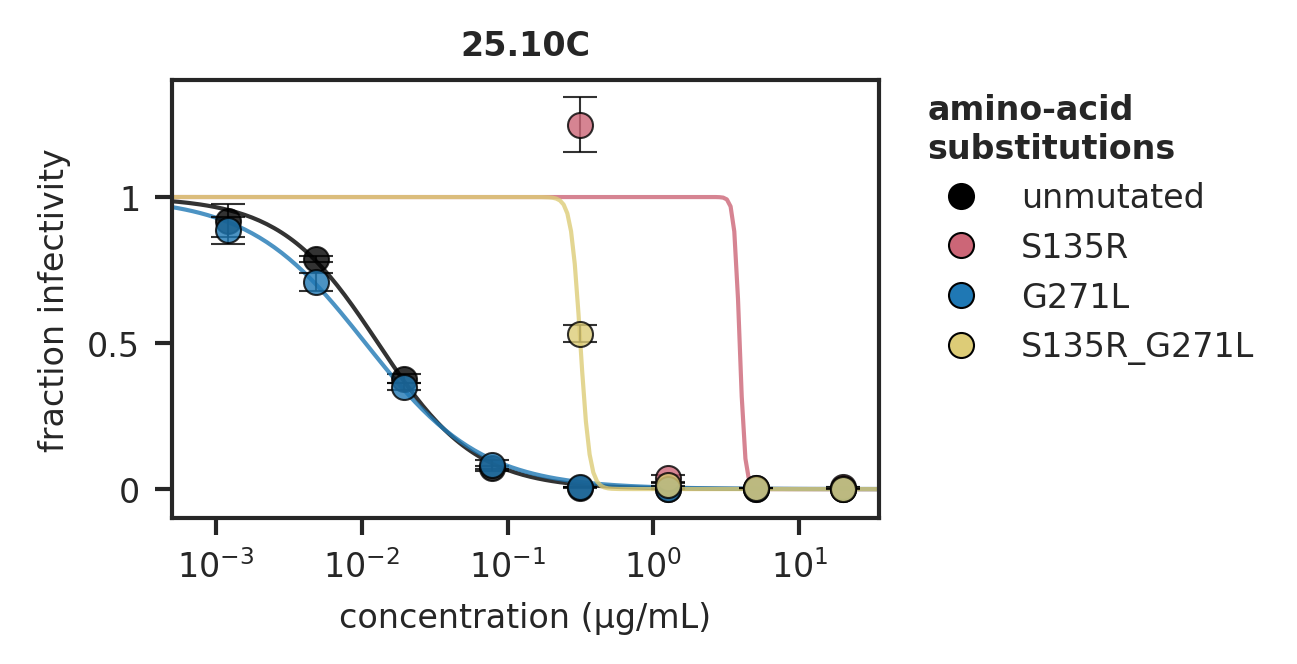

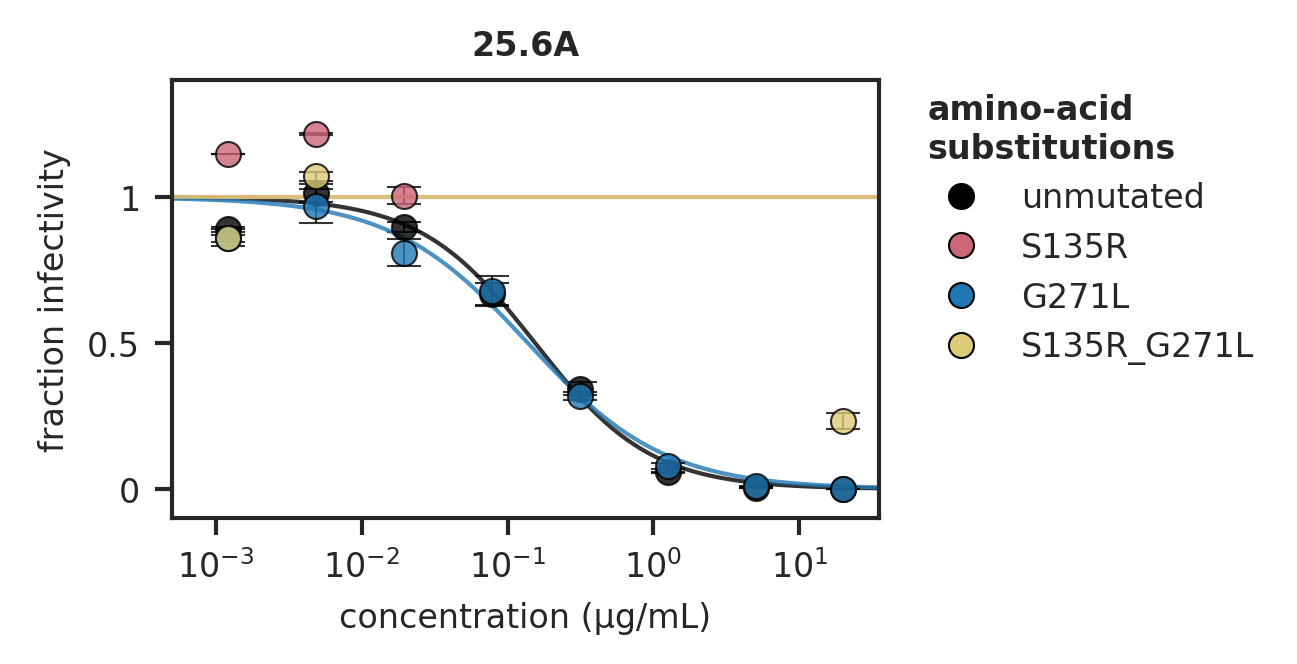

In [2]:
# Read data
df = pd.read_excel("data/escape_validations_fraction_infected.xlsx")

# Supress fitting warnings
warnings.simplefilter("ignore")

output_dir = "results/antibody_enhancement_curves/"

# Make output dir if doesn't exist
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

for antibody in df["serum"].unique():

    # Fit hill curves using neutcurve
    fits = neutcurve.curvefits.CurveFits(
        data=df.query("serum == @antibody"),
        fixbottom=0,
        fixtop=1,
    )
    
    # Plotting colors
    tol_muted_adjusted = [
        "#000000",
        "#CC6677", 
        "#1f78b4", 
        "#DDCC77", 
        "#117733", 
        "#882255", 
        "#88CCEE",
        "#44AA99", 
        "#999933", 
        "#AA4499", 
        "#EE7733",
        "#CC3311",
        "#DDDDDD",
    ]
    
    # Markers
    markers = [
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
    ]
    
    fig, axes = fits.plotSera(
        colors=tol_muted_adjusted,
        markers=markers,
        xlabel="",
        ylabel="",
        attempt_shared_legend=False,
        ncol=1,
    )
    axes[0,0].set_title(
        antibody, 
        weight="bold",
        fontsize=8,
    )
    axes[0,0].set_xlabel(
        "concentration (\u03BCg/mL)", 
        fontsize=8,
        # weight="bold",
    )
    axes[0,0].set_ylabel(
        "fraction infectivity", 
        fontsize=8,
        # weight="bold",
    )
    axes[0,0].set_ylim(-0.1, 1.4)
    axes[0,0].set_yticks([0, 0.5, 1])
    axes[0,0].set_yticklabels(labels=[0, 0.5, 1], fontsize=8)
    axes[0,0].set_xlim(0.0005, 35)
    axes[0,0].set_xticks([0.001, 0.01, 0.1, 1, 10])
    axes[0,0].set_xticklabels(labels=["$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^0$", "$10^1$"], fontsize=8)
    sns.move_legend(
        axes[0,0], 
        bbox_to_anchor=(1.05, 1), 
        loc="upper left",
        borderaxespad=0,
        frameon=False,
        fontsize=8,
        title="amino-acid\nsubstitutions",
        title_fontproperties={"weight" : "bold", "size" : 8},
        alignment="left"
    )
    
    plt.setp(axes[0,0].collections, alpha=0.8, linewidths=0.5, colors="black") # for vertical error bar segment
    plt.setp(axes[0,0].lines, alpha=0.8, markeredgewidth=0.5, markeredgecolor="black", linewidth=1) # for the lines and markers
    
    # Add edges to legend markers to match scatter plot
    for ha in axes[0,0].legend_.legend_handles:
        ha.set_markeredgecolor("black")
        ha.set_markeredgewidth(0.5)
        ha.set_linewidth(0)
        
    # Change all spines
    for axis in ["top", "bottom", "left", "right"]:
        axes[0,0].spines[axis].set_linewidth(1)
    axes[0,0].tick_params(axis="both", length=4, width=1)
    
    width = 3
    height = 2
    fig.set_size_inches(width, height)

## Plot neut curves with expanded Y-axis to show enhanced infection

In [3]:
def plot_neut_curves(df, zero_to_one):

    # Plotting colors
    tol_muted_adjusted = [
        "#000000",
        "#CC6677", 
        "#1f78b4", 
        "#DDCC77", 
        "#117733", 
        "#882255", 
        "#88CCEE",
        "#44AA99", 
        "#999933", 
        "#AA4499", 
        "#EE7733",
        "#CC3311",
        "#DDDDDD",
    ]
    
    # Markers
    markers = [
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
        "o",
    ]

    # Set figure size and subplots
    fig, axes = plt.subplots(
        figsize=(3, 2), 
    )
    
    for i,val in enumerate(df["virus"].unique()):
        chart = sns.lineplot(
            data=df.query("virus == @val"),
            x="concentration",
            y="fraction infectivity average",
            color=tol_muted_adjusted[i],
            marker=markers[i],
            markeredgecolor="#000000",
            markeredgewidth=0.5,
            alpha=0.8,
            linewidth=1,
            label=val,
            ax=axes,
            legend=False,
        )
        chart.set_title(
            f"{antibody}", 
            fontsize=8,
            weight="bold",
        )
        chart.set_xscale("log")
        chart.xaxis.set_minor_locator(mticker.NullLocator())  # no minor ticks
        if zero_to_one:
            chart.set_ylim(-0.1, 1.4)
            chart.set_yticks([0, 0.5, 1])
            chart.set_yticklabels(labels=[0, 0.5, 1], fontsize=8)
        else:
            chart.set_ylim(-5, 65)
            chart.set_yticks([0, 10, 20, 30, 40, 50, 60])
            chart.set_yticklabels(labels=[0, 10, 20, 30, 40, 50, 60], fontsize=8)
        chart.set_xlim(0.0005, 35)
        chart.set_xticks([0.001, 0.01, 0.1, 1, 10])
        chart.set_xticklabels(labels=["$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^0$", "$10^1$"], fontsize=8)
        chart.set_xlabel(
            "concentration (\u03BCg/mL)", 
            fontsize=8,
            # weight="bold",
        )
        chart.set_ylabel(
            "fraction infectivity", 
            fontsize=8,
            # weight="bold",
        )
    
        # Change all spines
        for axis in ["top", "bottom", "left", "right"]:
            chart.spines[axis].set_linewidth(1)
        chart.tick_params(axis="both", length=4, width=1)
    
        chart.errorbar(
            x=df.query("virus == @val")["concentration"],
            y=df.query("virus == @val")["fraction infectivity average"],
            yerr=df.query("virus == @val")["fraction infectivity stdev"],
            fmt="none",
            ecolor="#000000",
            capsize=5,
            capthick=0.5,
            elinewidth=0.5,
        )
    
    # Function add a legend 
    leg = fig.legend(
        title="amino acid\nsubstitutions",
        title_fontproperties = {
            "size" : 8,
            "weight" : "bold",
        },
        loc="upper left", 
        bbox_to_anchor=(1,1),
        fontsize=8,
        frameon=False,
        borderaxespad=0,
        alignment="left",
    )

    # Add edges to legend markers to match scatter plot
    for ha in leg.get_lines():
        ha.set_linewidth(0)
        
    if zero_to_one:
        plt.savefig(
            output_dir + antibody.replace(".", "").replace(" ", "_") + ".svg",
        )
    else:
        plt.savefig(
            output_dir + antibody.replace(".", "").replace(" ", "_") + "_increased_axis.svg",
        )

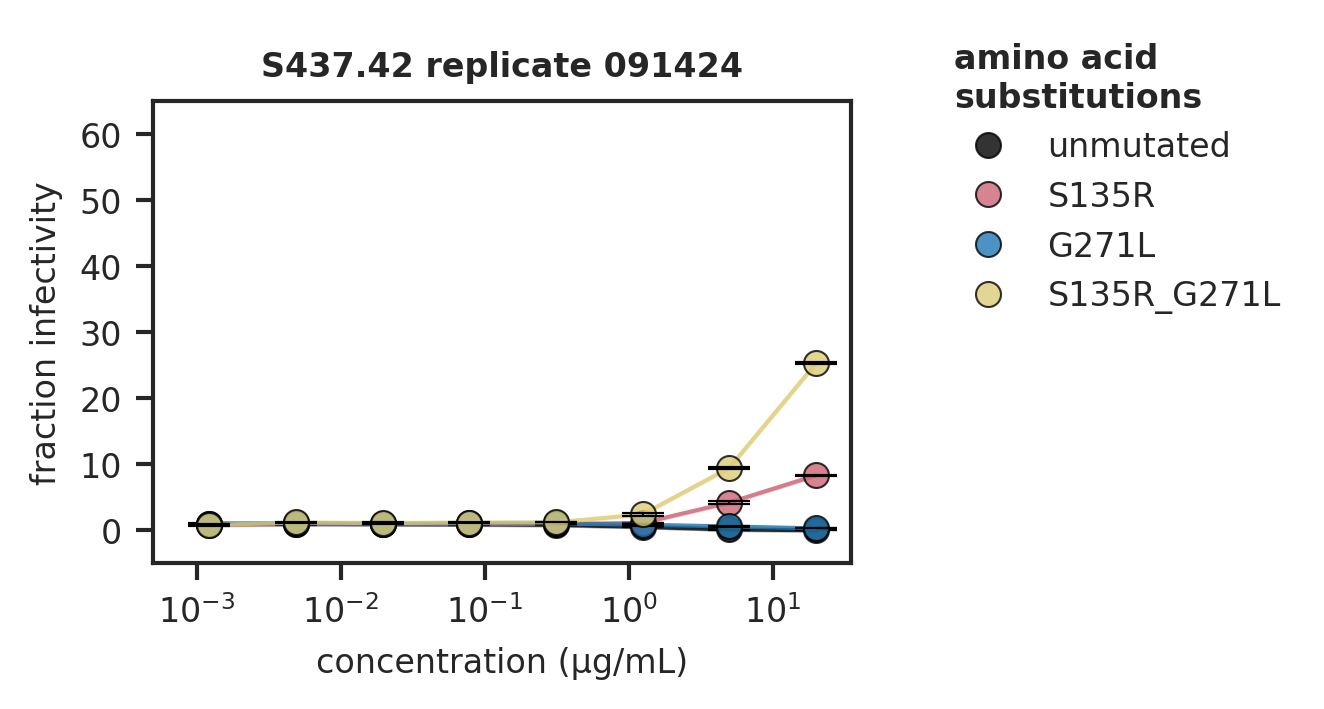

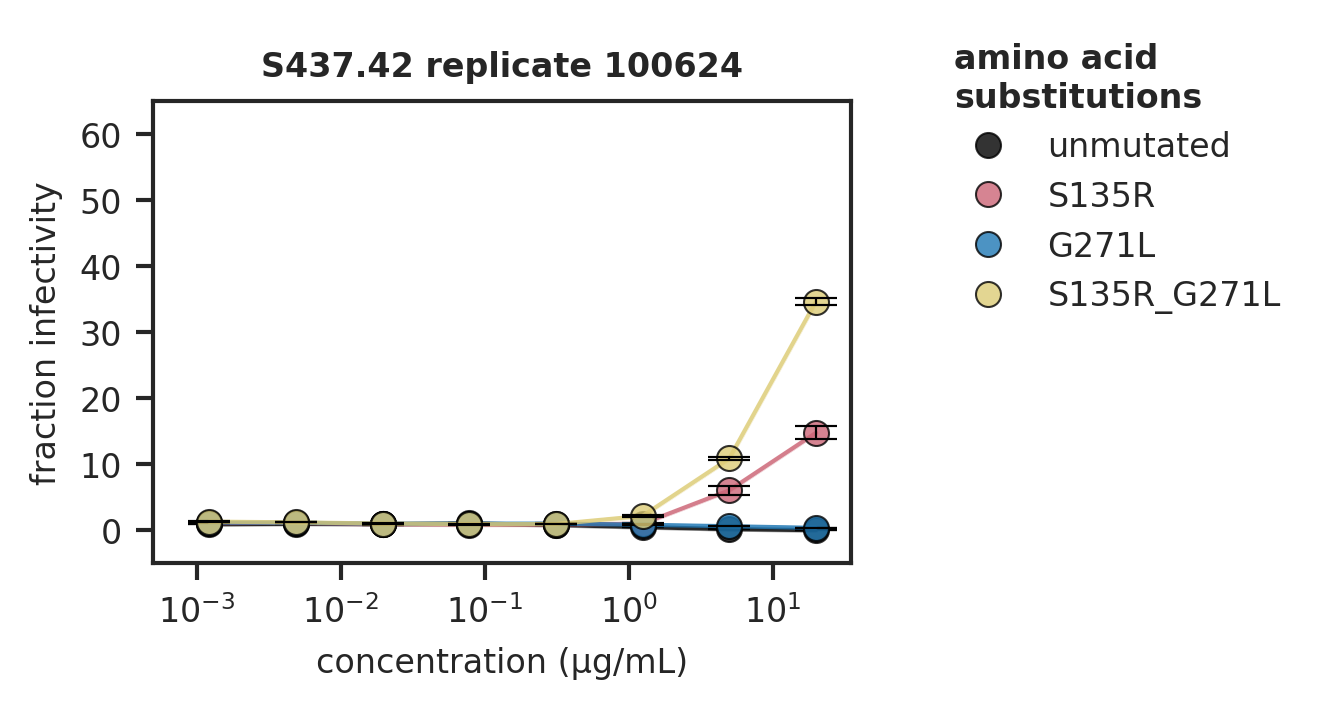

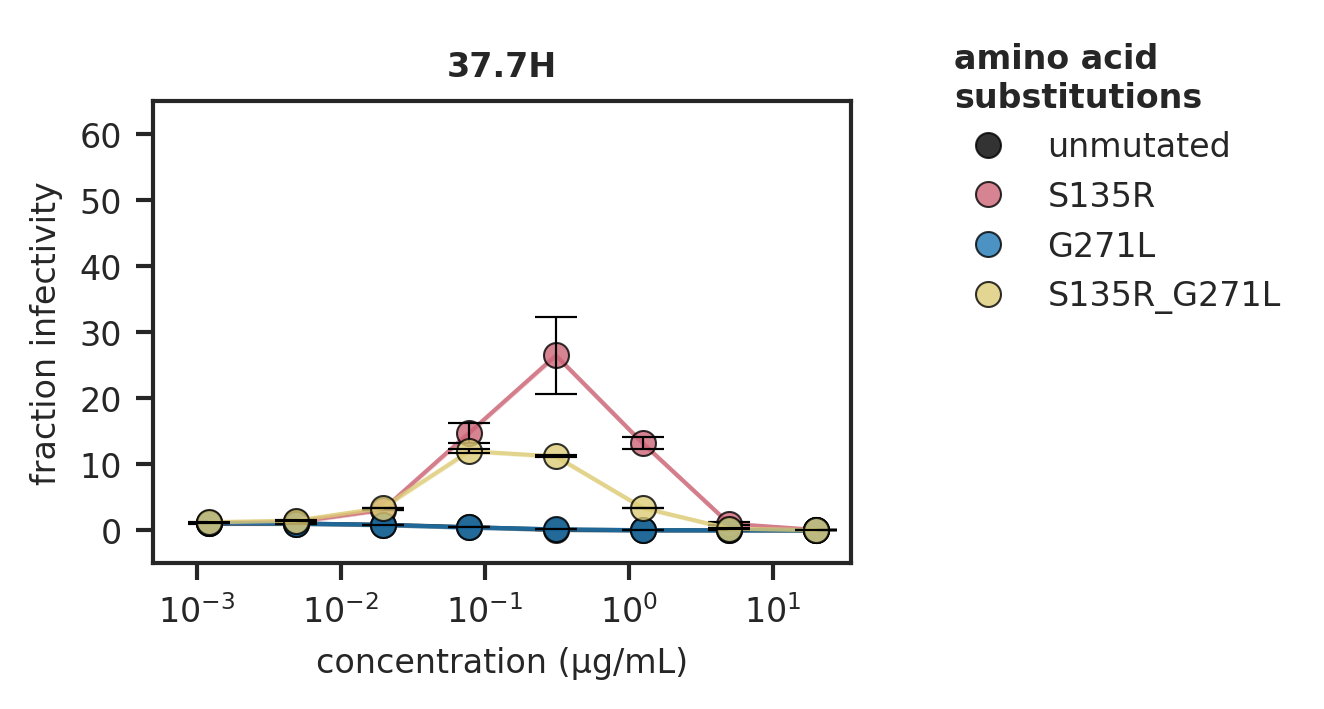

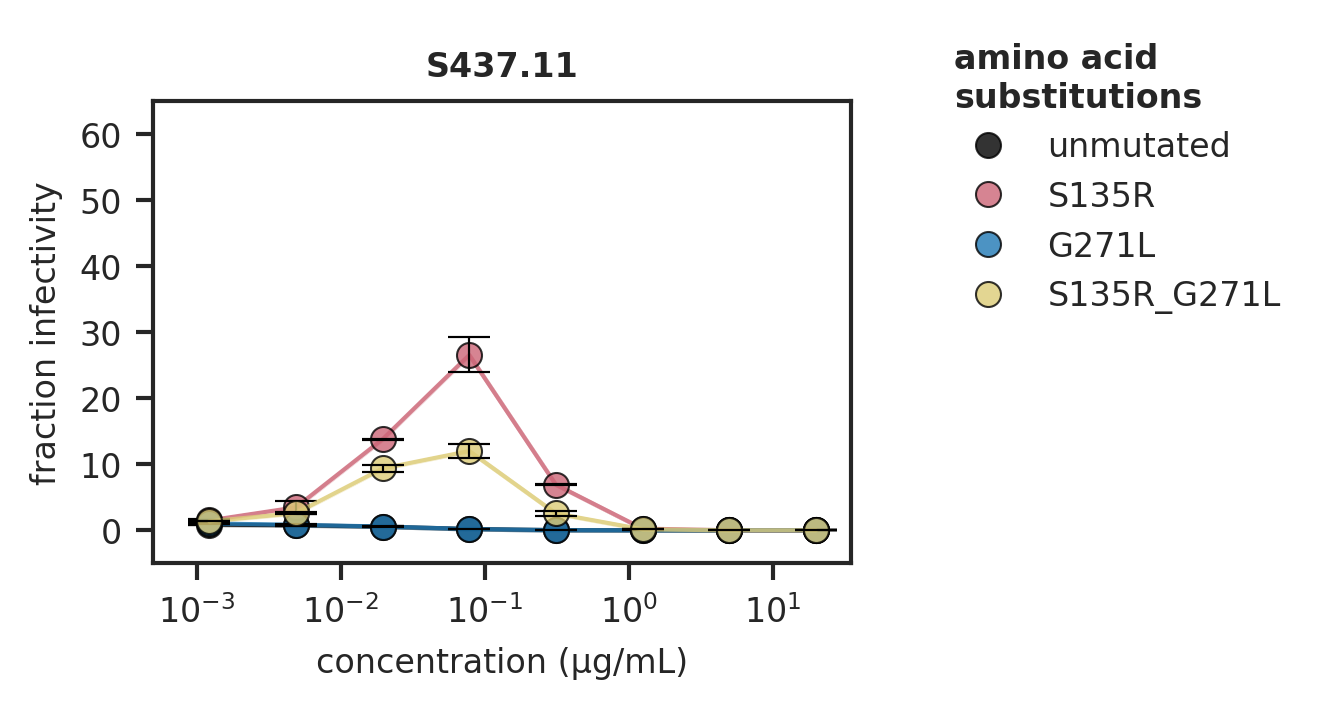

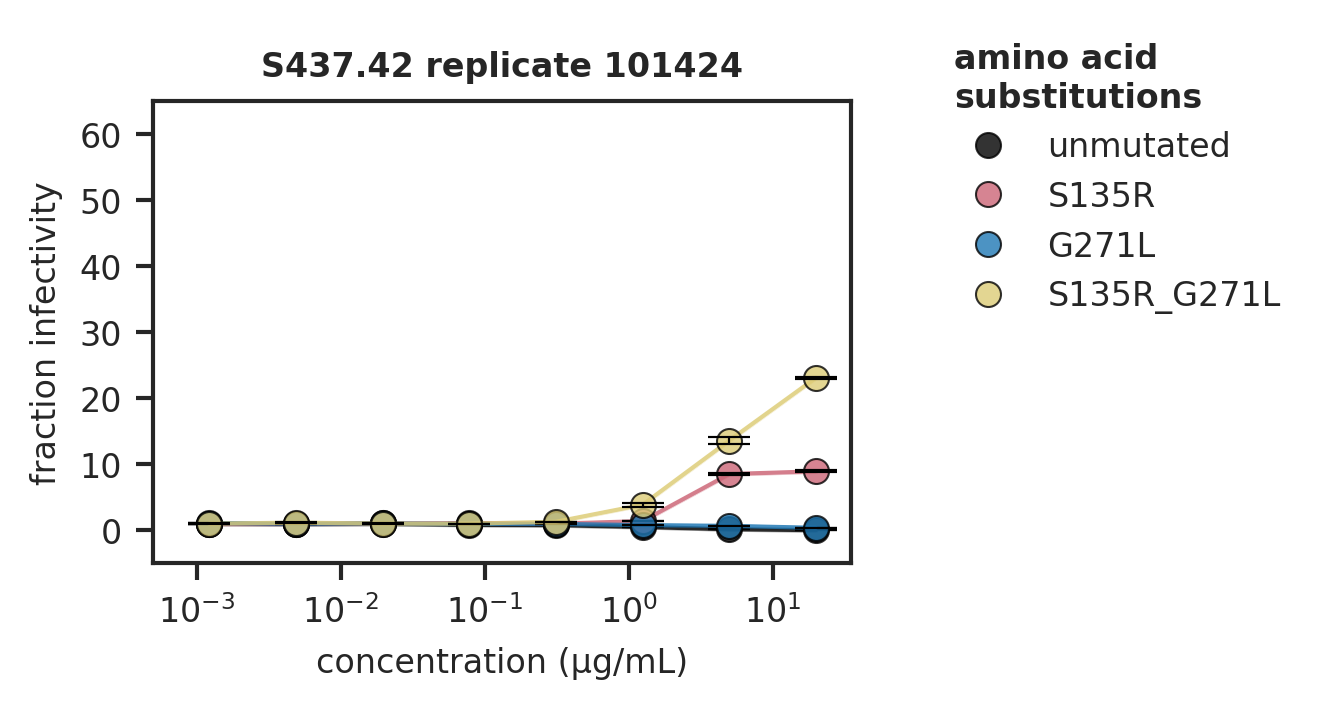

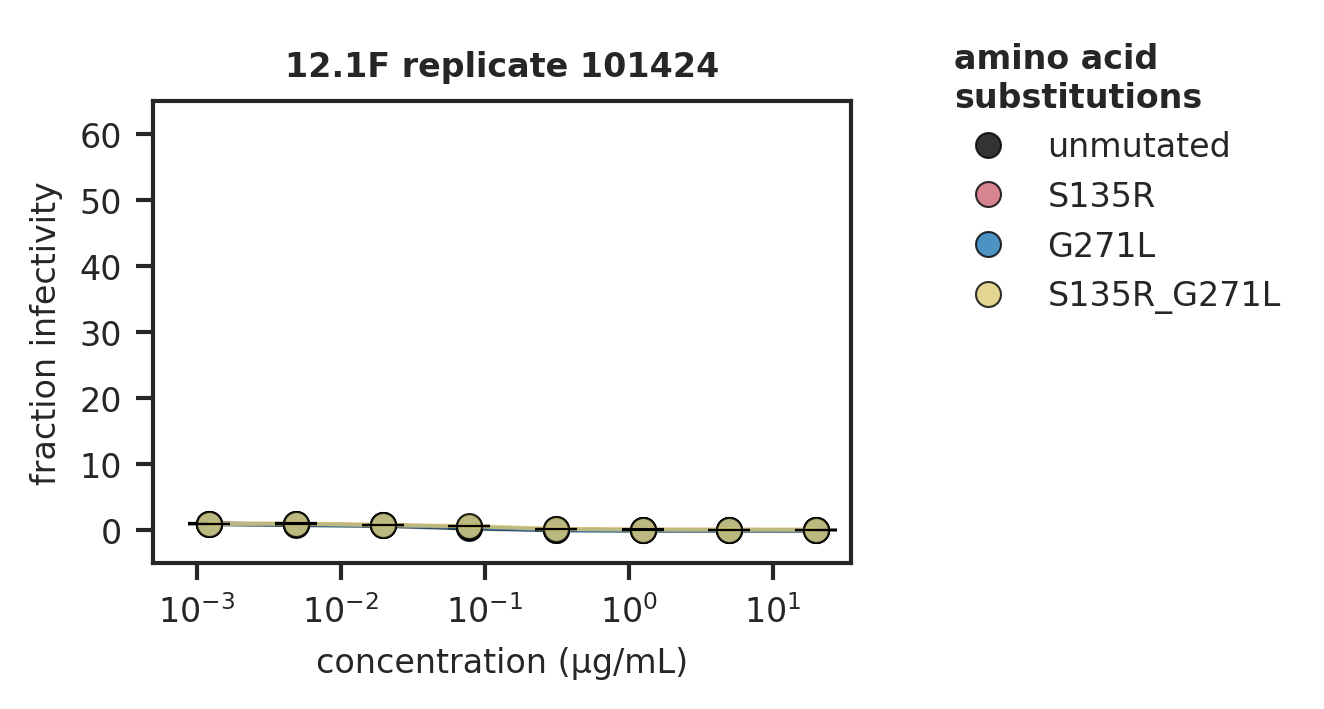

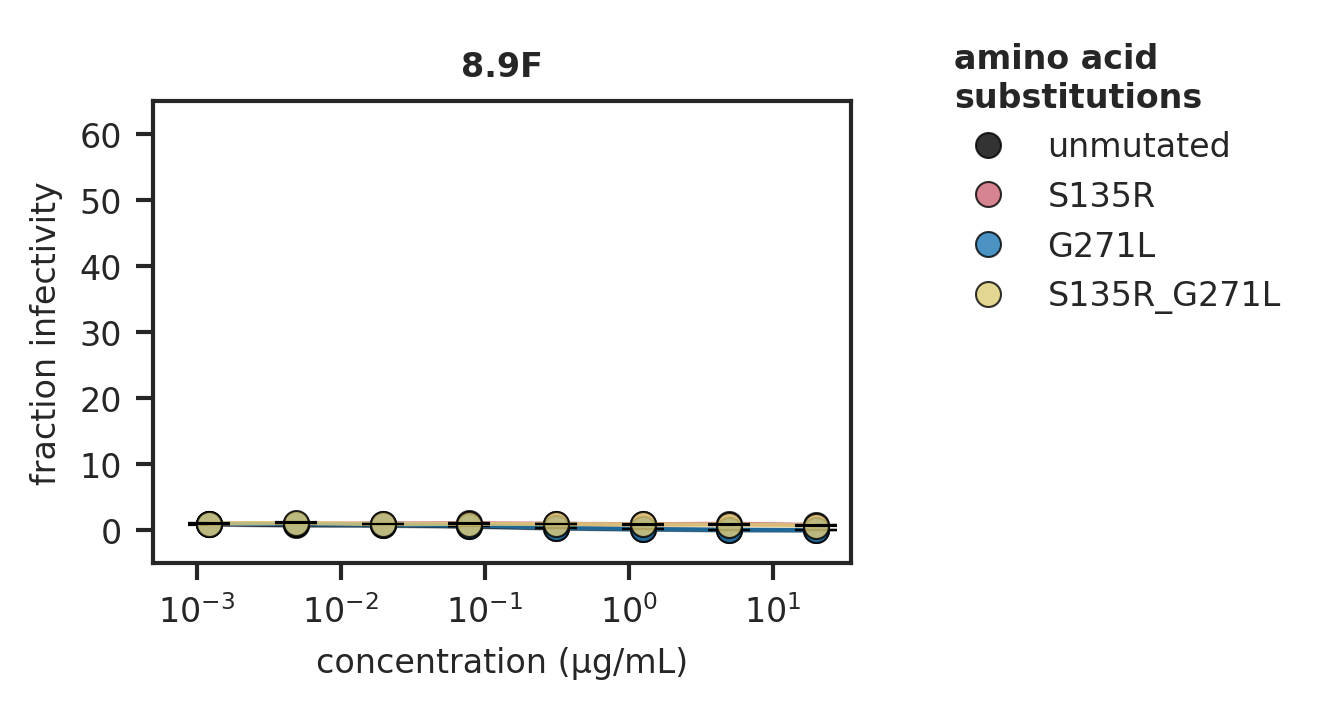

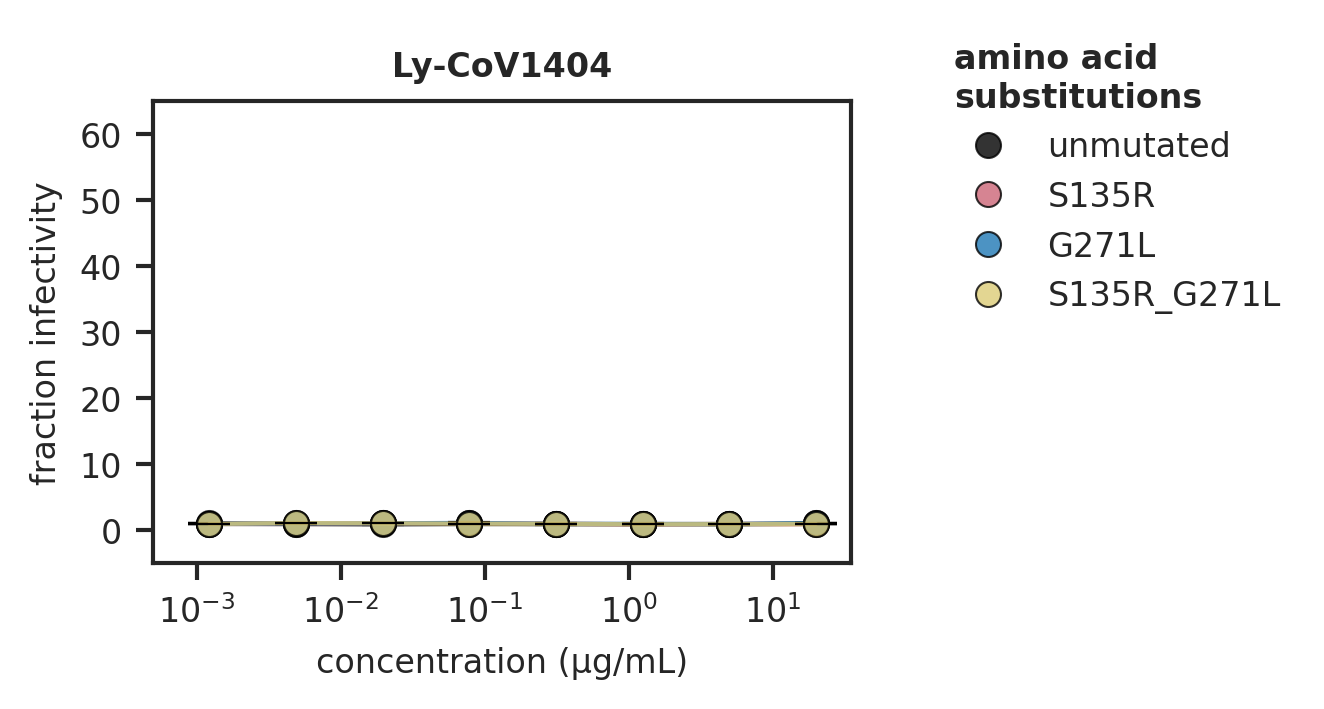

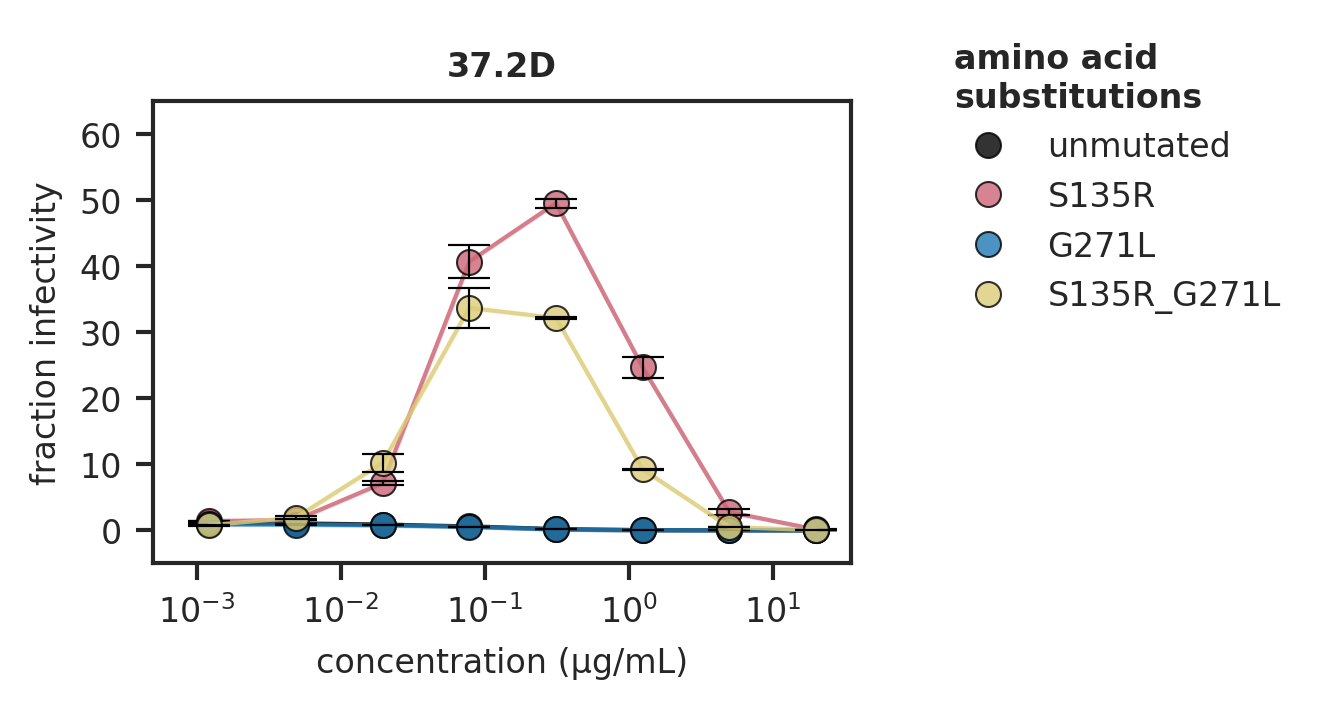

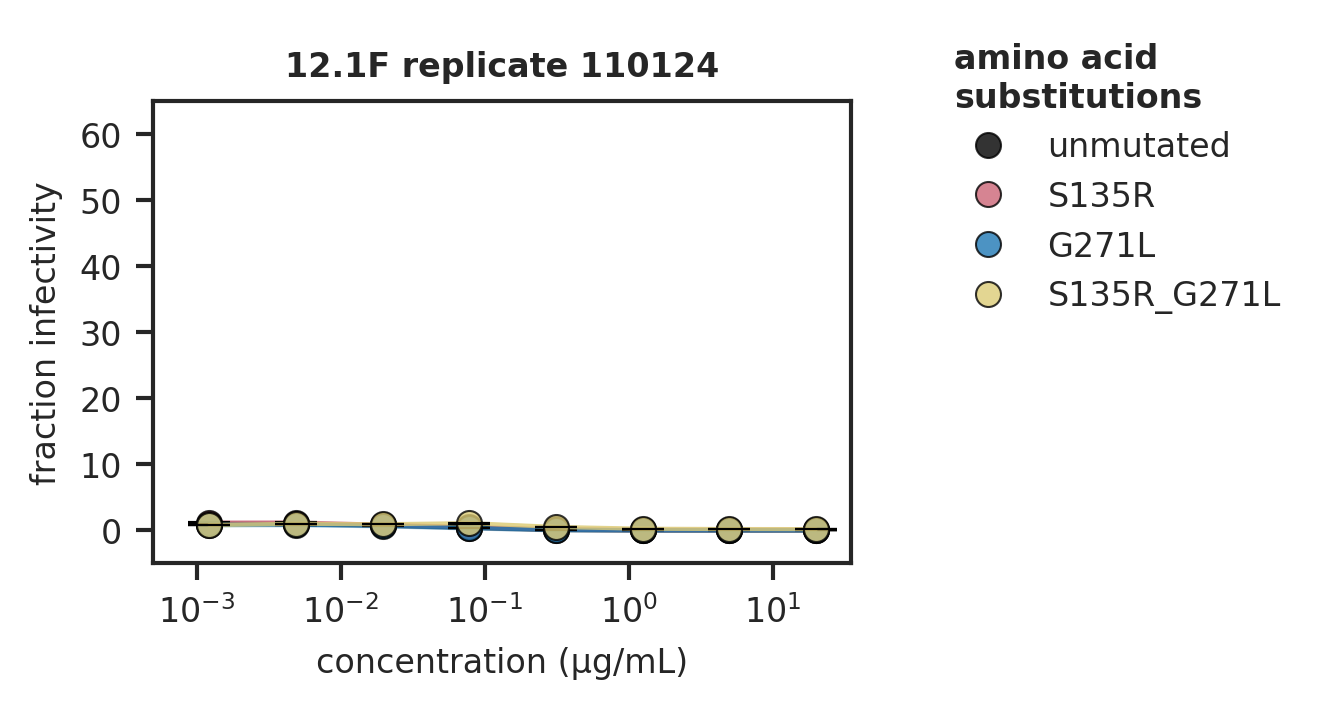

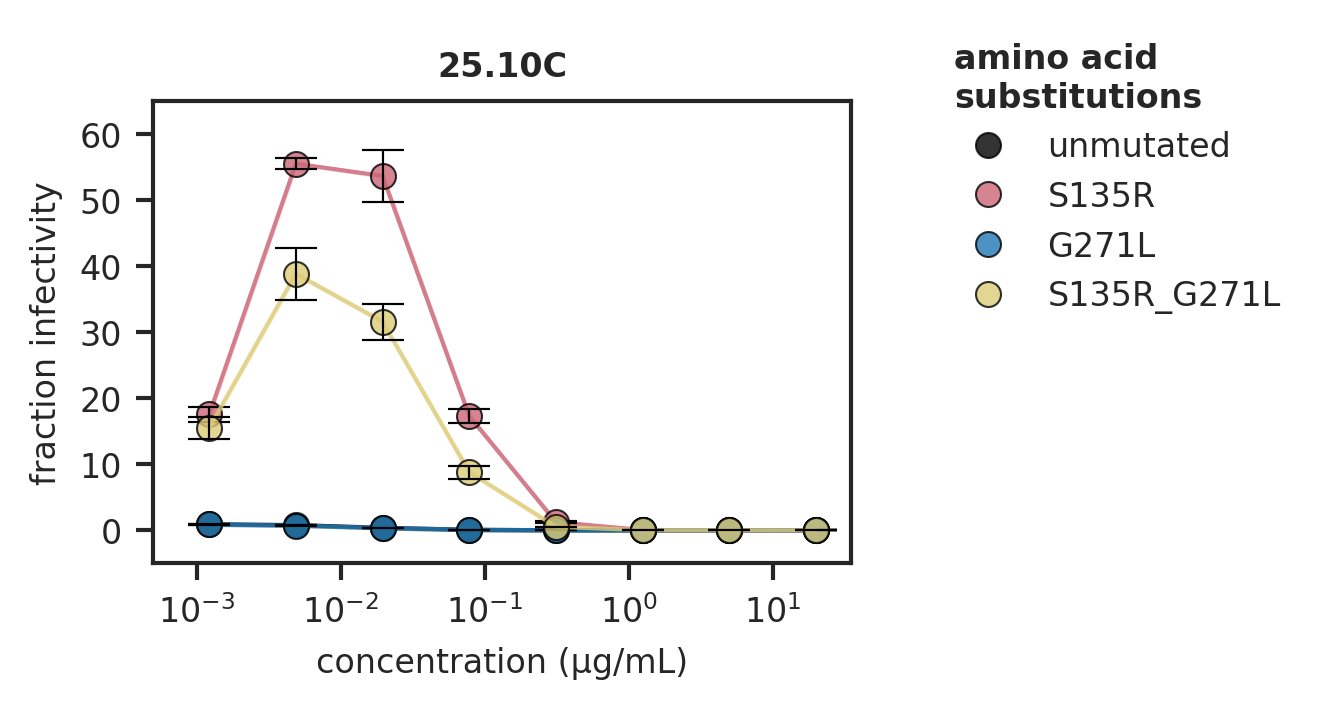

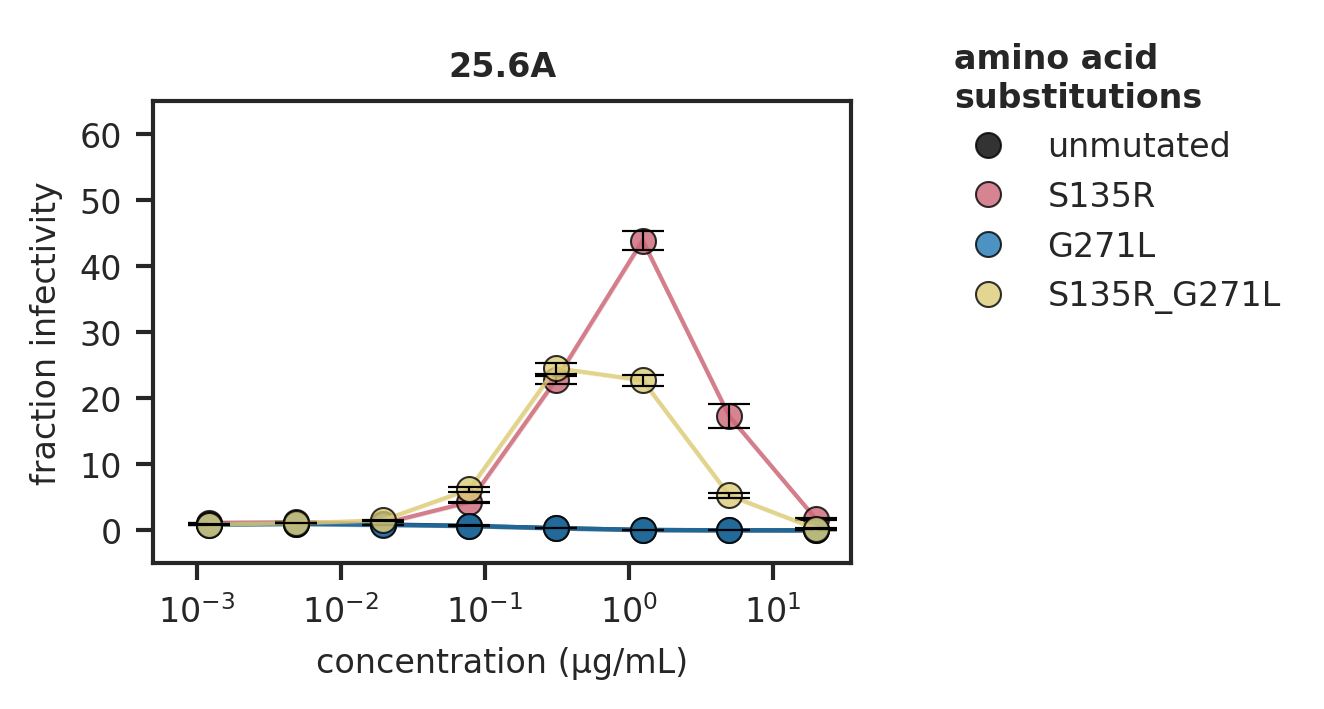

In [4]:
# Read data
df = pd.read_excel("data/escape_validations_fraction_infected.xlsx")

df_avg = (
    df
    .groupby(["serum", "virus", "concentration"])
    .aggregate({
        "fraction infectivity" : "mean",
    })
    .rename(columns={"fraction infectivity" : "fraction infectivity average"})
    .reset_index()
)

df_std = (
    df
    .groupby(["serum", "virus", "concentration"])
    .aggregate({
        "fraction infectivity" : "std",
    })
    .rename(columns={"fraction infectivity" : "fraction infectivity stdev"})
    .reset_index()
)


df = (
    df.merge(
        df_avg,
        how="left",
        on=["serum", "virus", "concentration"],
        validate="many_to_one",
    )
)

df = (
    df.merge(
        df_std,
        how="left",
        on=["serum", "virus", "concentration"],
        validate="many_to_one",
    )
)

for antibody in df["serum"].unique():
    plot_neut_curves(df.query("serum == @antibody"), False)

## Non-Hill curve hit neutralization curves

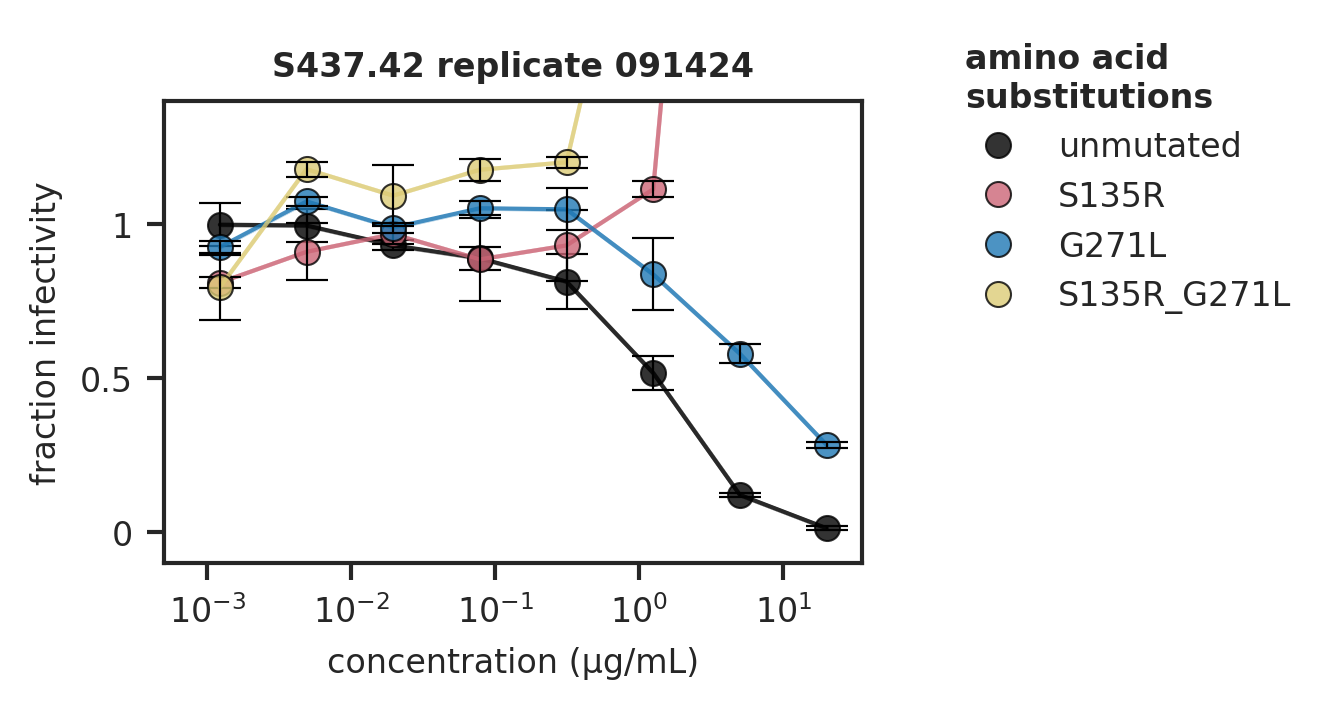

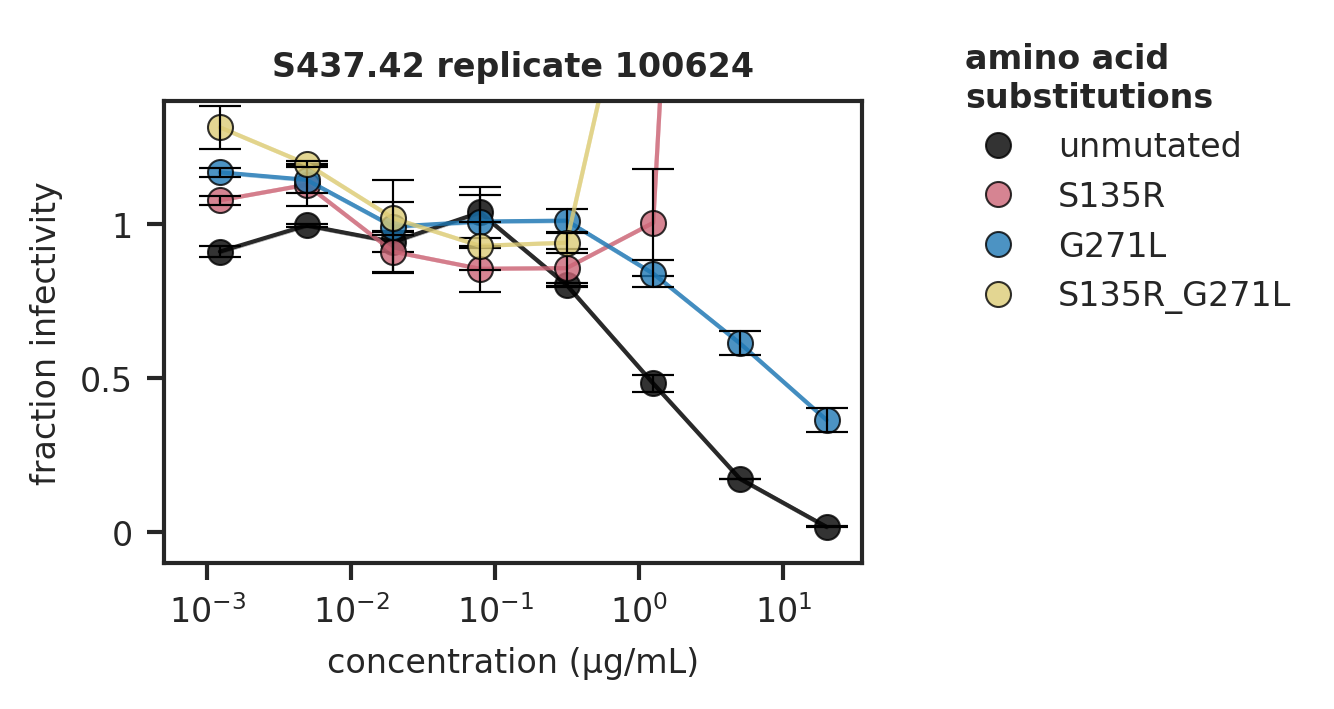

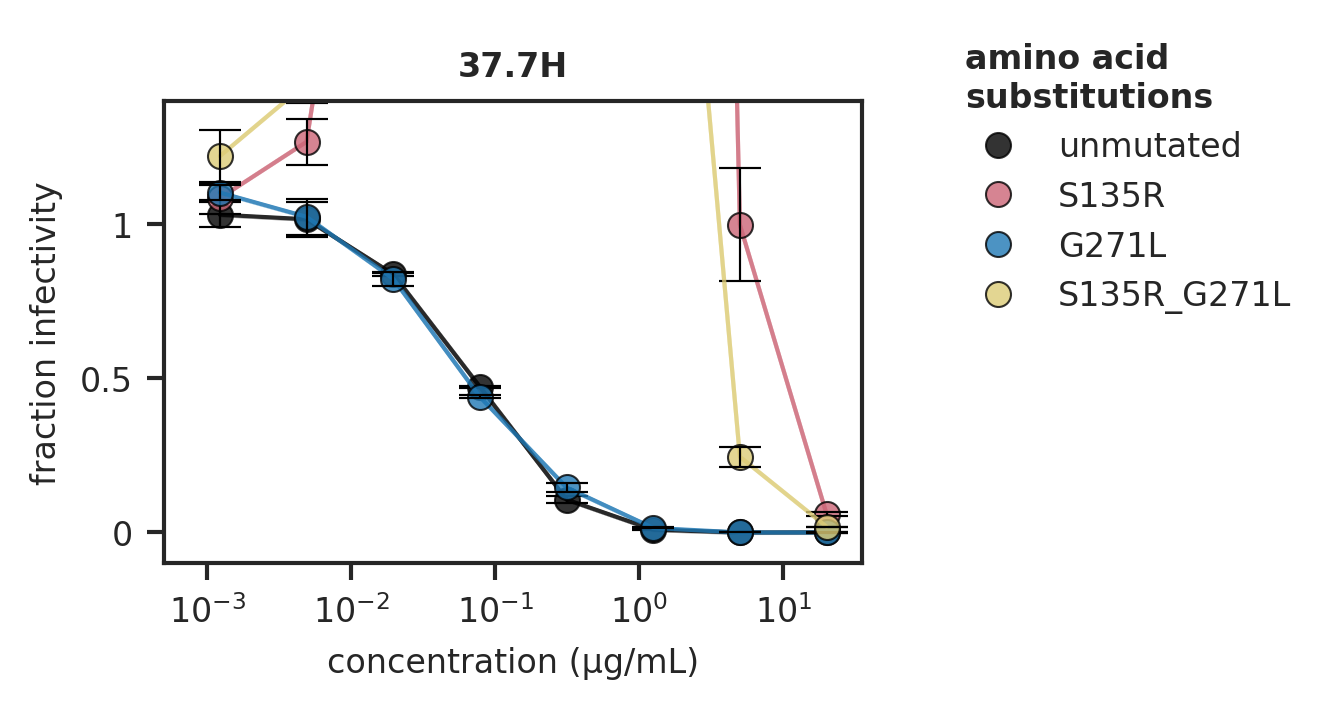

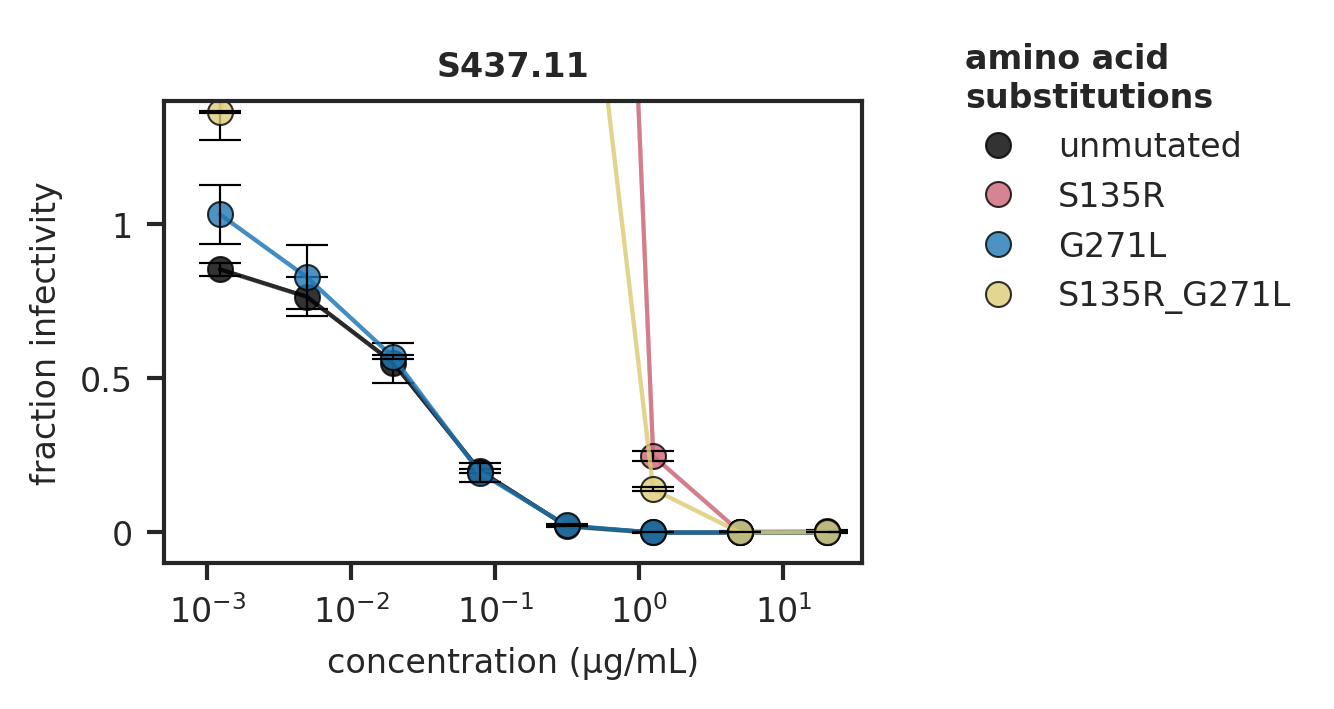

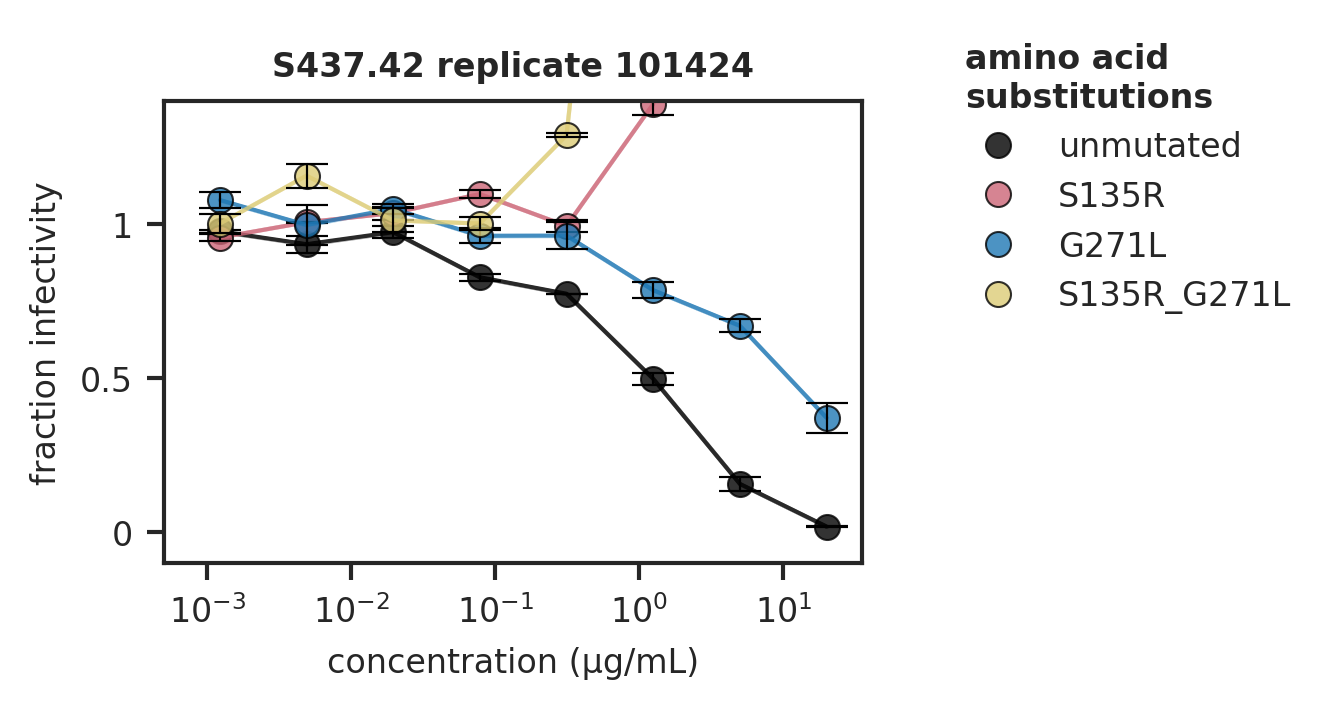

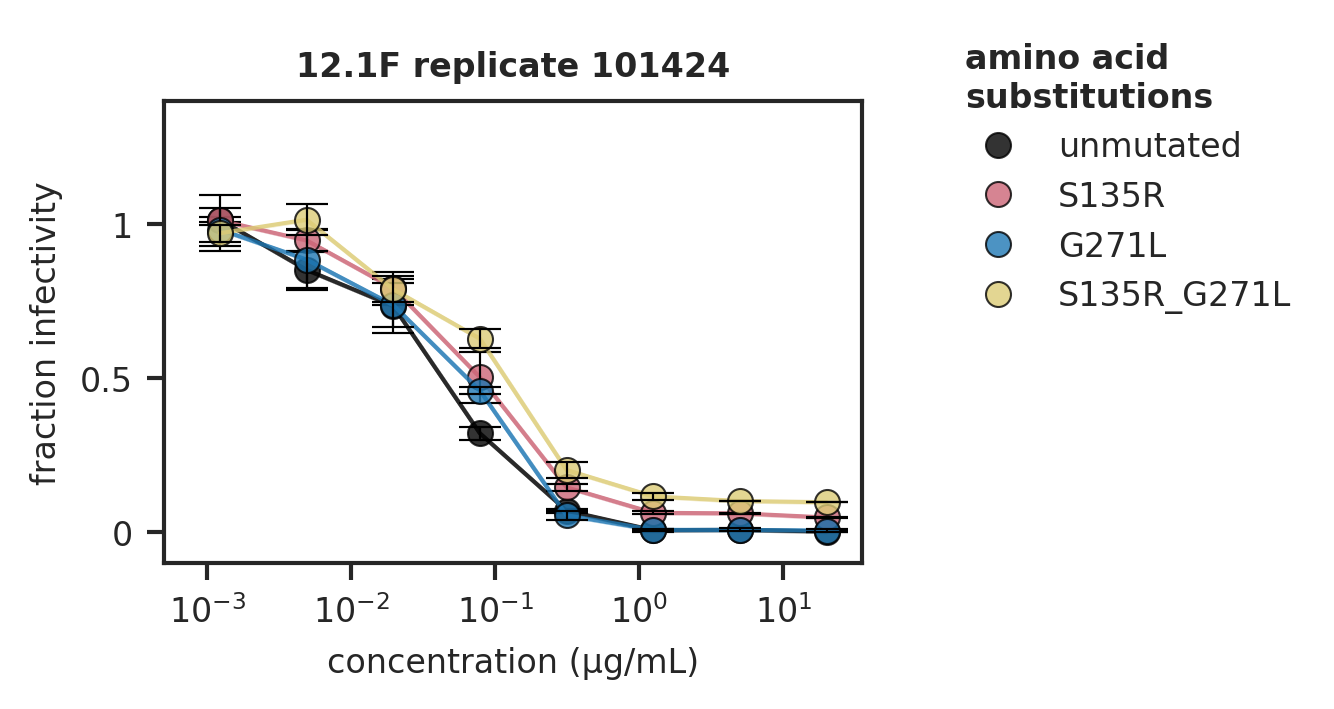

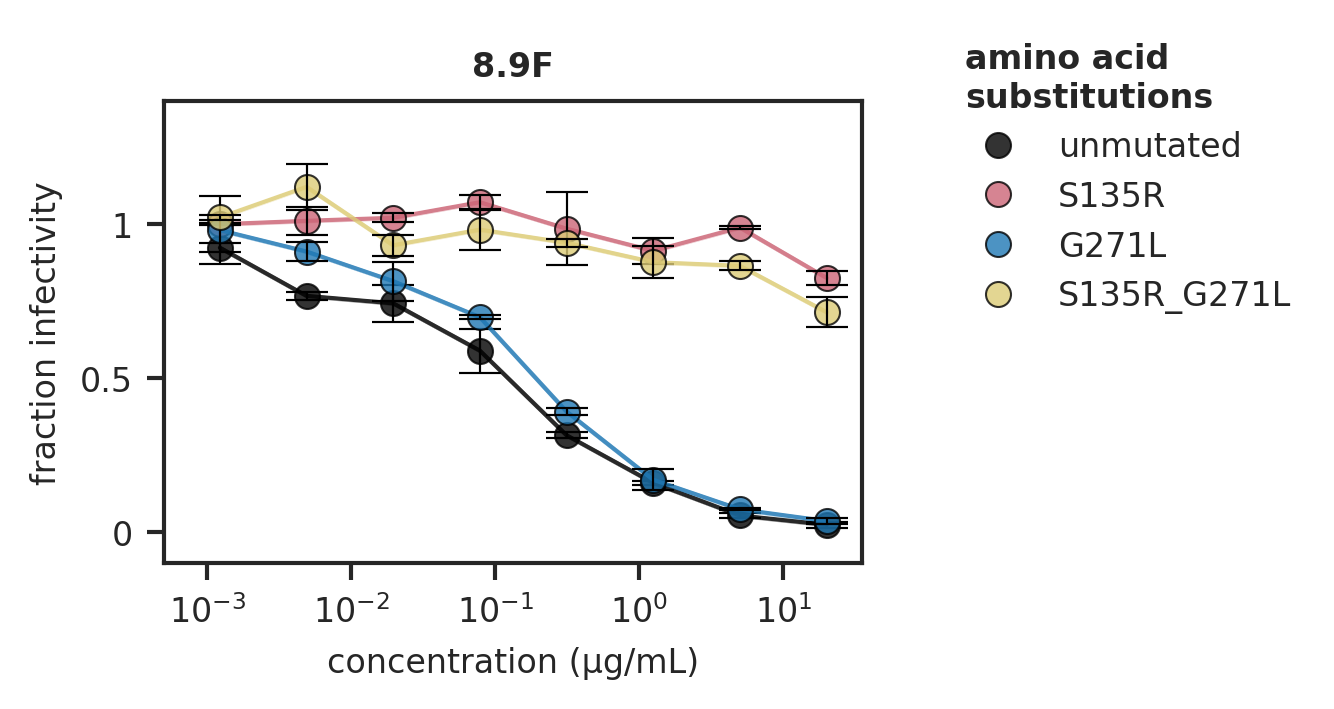

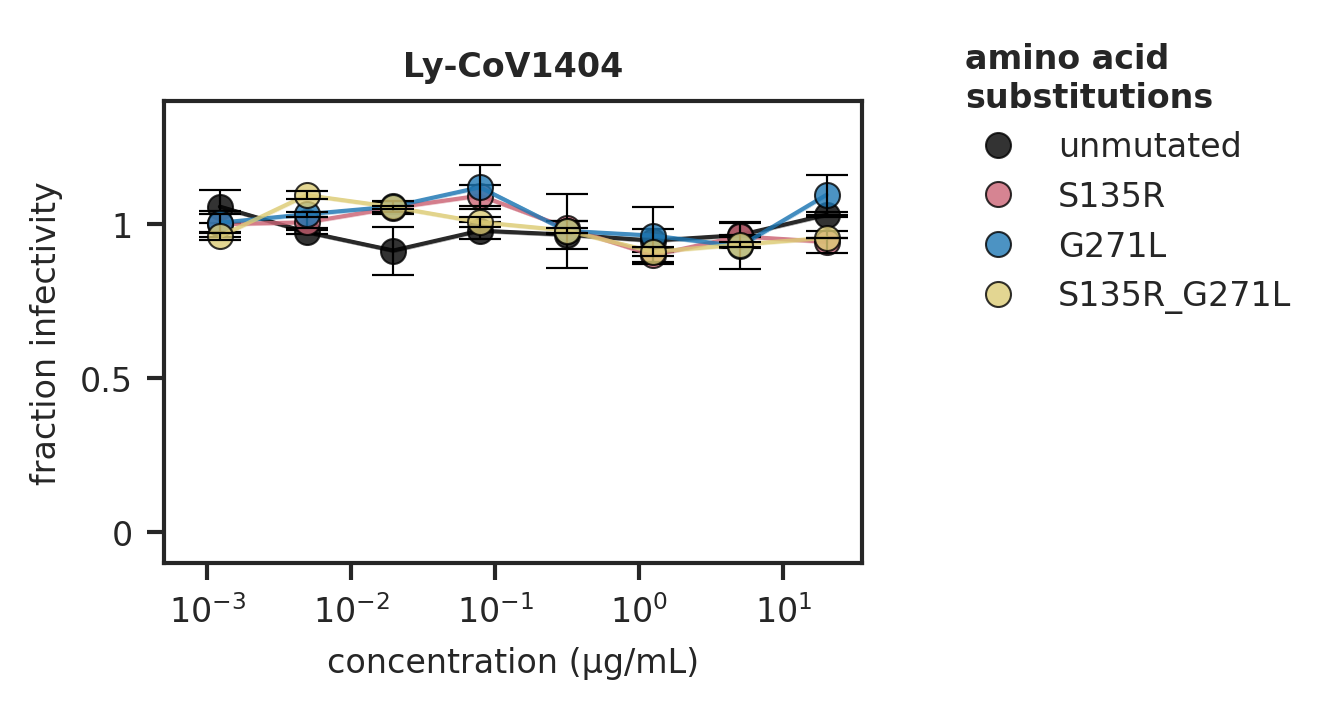

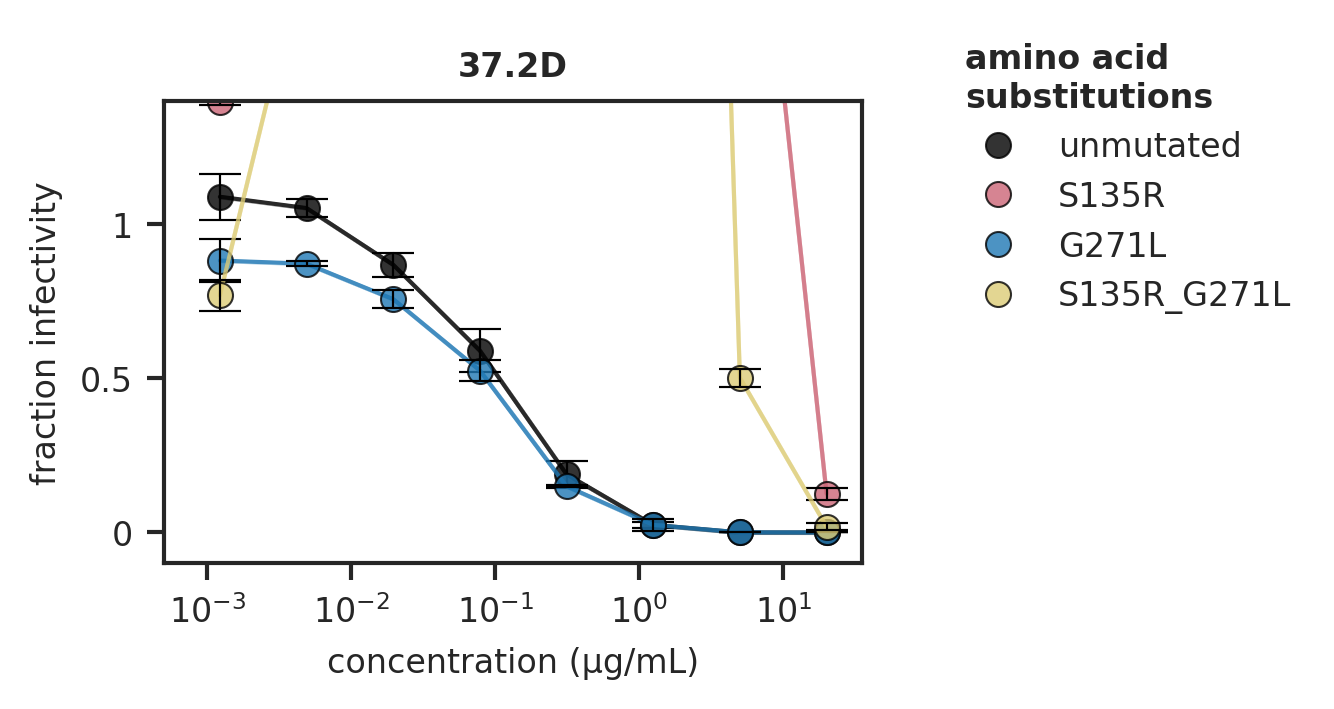

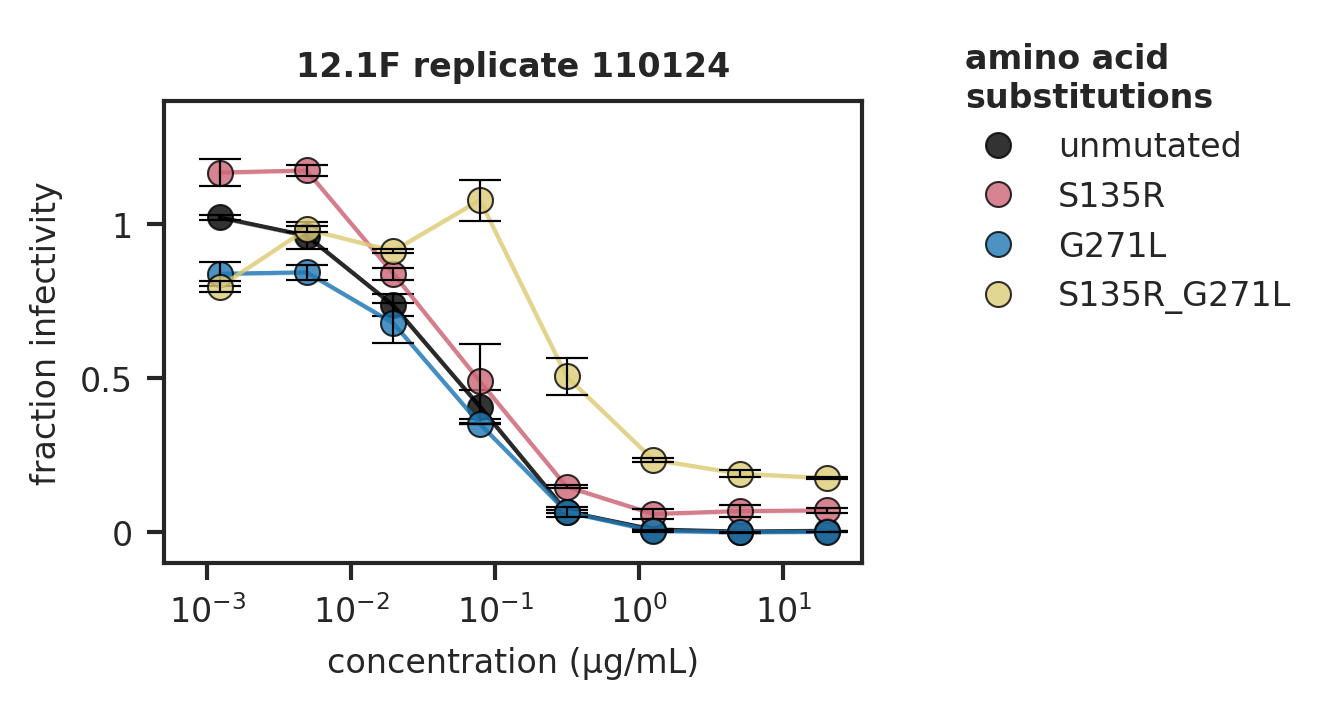

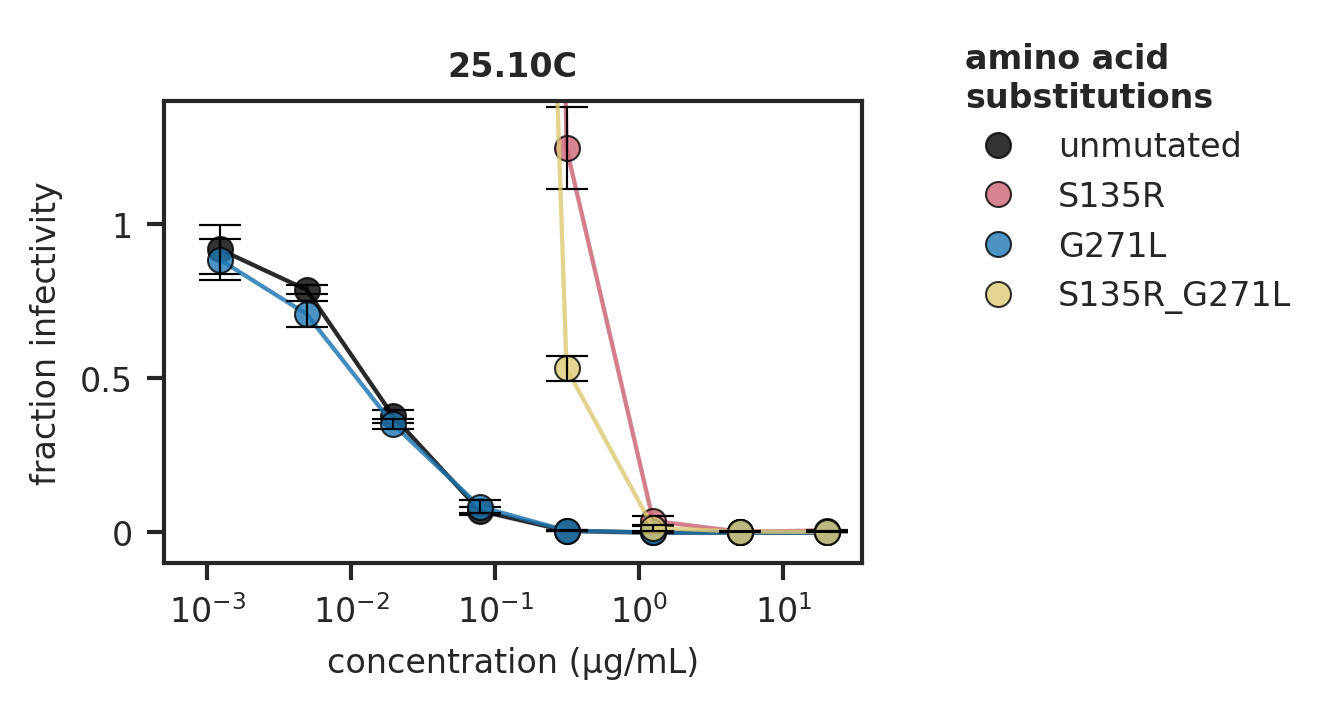

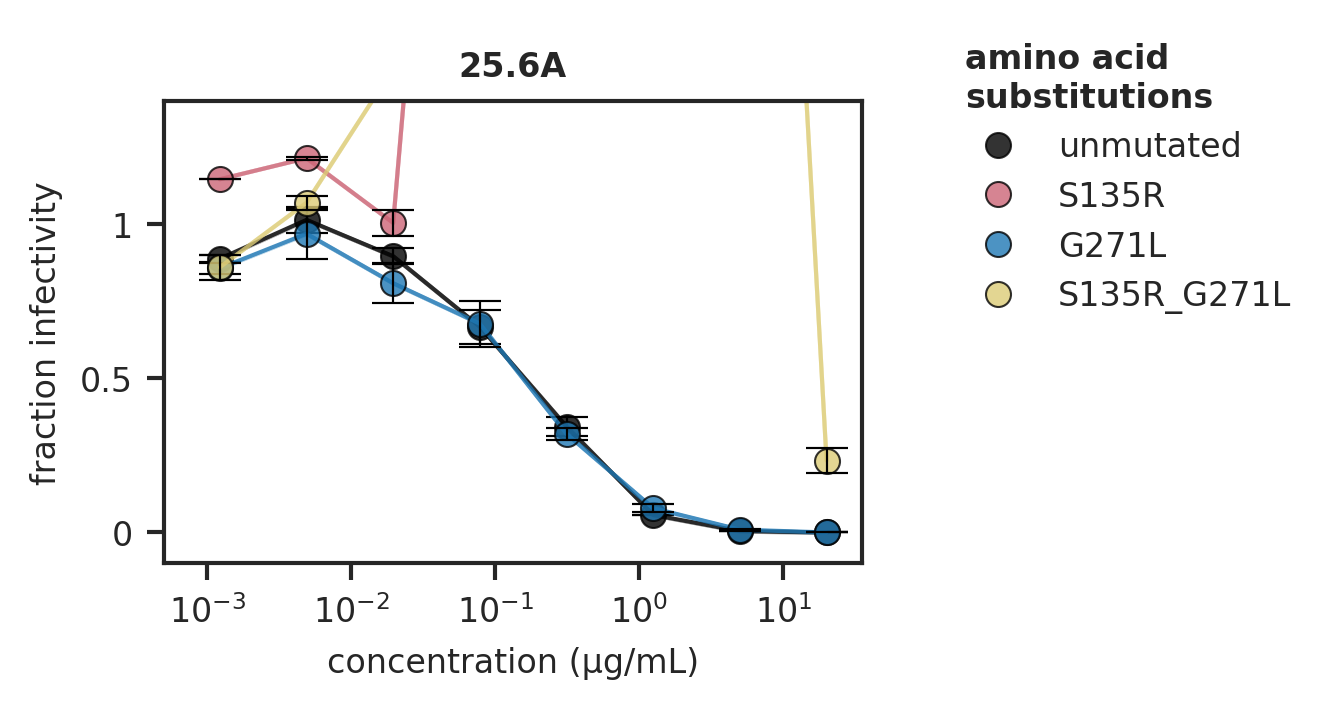

In [5]:
for antibody in df["serum"].unique():
    plot_neut_curves(df.query("serum == @antibody"), True)